### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Helper Functions

In [ ]:
def plot_training_loss(J_list):
    iterations = list(range(1, len(J_list) + 1))
    plt.figure(figsize=(14.5, 4))
    plt.plot(iterations, J_list, marker='o')
    plt.ylabel('Training Loss')
    plt.xlabel('Iterations')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_thetas(thetas, J_list, LR):
    num_thetas = len(thetas)
    fig, axes = plt.subplots(num_thetas, 1, figsize=(12, 4 * num_thetas))

    for i, key in enumerate(thetas):
        axes[i].plot(thetas[key], J_list, marker='o', label=key)
        axes[i].set_xlabel(f'{key} Values')
        axes[i].set_ylabel('Loss')
        axes[i].set_title(f'Learning Rate {LR}')
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


### Toy Datasts

In [ ]:
# Creating a toy dataset 1
X_1 = np.linspace(0,20)
a = -1
b = 2
y_1 = a * X_1 + b


In [ ]:
# Creating a toy dataset 2
np.random.seed(42)
X_2 = np.random.rand(100, 2)
y_2 = 3 * X_2[:, 0] + 5 * X_2[:, 1] + 2

### First Order Optimizer Class

- `Takes X and y as numpy arrays`
- `batch_size = None --> batch`
- `batch_size = 1 --> stochastic`
- `batch_size = integer --> mini-batch`

In [ ]:
# Defining a class

class Optimizer:

  # Initializations
  def __init__(self, optimizer_type = 'adam', alpha = 0.01, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, gamma = 0.5 ,
                 max_epochs = 1000, grad_check = 0.001, cost_check = 0.001, batch_size = None):

    self.optimizer_type = optimizer_type.lower()
    self.alpha = alpha
    self.beta1 = beta1
    self.beta2 = beta2
    self.epsilon = epsilon
    self.gamma = gamma
    self.max_epochs = max_epochs
    self.grad_check = grad_check
    self.cost_check = cost_check
    self.batch_size = batch_size

  # ADAM Optimizer
  def __Adam_train(self):

    v = np.zeros((self.X_augmented.shape[1], 1))
    m = np.zeros((self.X_augmented.shape[1], 1))

    iteration = 0
    Epoch = 0

    J_list = []
    thetas_dict = dict()
    h_x_list = []

    while Epoch < self.max_epochs:

      print(f'****************** Epoch {Epoch} ********************\n')

      # For each Epoch loop over the batchs
      for i in range(self.num_batches):

        start_idx = i * self.batch_size
        end_idx = min((i + 1) * self.batch_size, len(self.X))
        x_batch = self.X[start_idx:end_idx]
        x_batch_aug = self.X_augmented[start_idx:end_idx]
        y_batch = self.y[start_idx:end_idx]

        for k , val in enumerate(self.thetas):
          key = f'theta{k}'
          if key not in thetas_dict:
            thetas_dict[key] = []
          thetas_dict[key].append(val)


        h_x = np.matmul(x_batch_aug , self.thetas)
        h_x_list.append(h_x)

        err_vector = h_x - y_batch
        len_err_vector = len(err_vector)
        J = (np.linalg.norm(err_vector)**2)/(2*len_err_vector)
        J_list.append(J)
        print(f'j = {J}\n')

        grad_vector = np.matmul(x_batch_aug.T,err_vector)/len_err_vector
        grad_vector_norm = np.linalg.norm(grad_vector)
        iteration = iteration + 1

        m = self.beta1 * m + (1 - self.beta1) * grad_vector
        v = self.beta2 * v + (1 - self.beta2) * grad_vector**2

        m_hat = m/(1 - self.beta1**iteration)
        v_hat = v/(1 - self.beta2**iteration)

        self.thetas = self.thetas - self.alpha/(np.sqrt(v_hat) + self.epsilon) * m_hat


      Epoch = Epoch + 1
      # Gradient Check
      if (grad_vector_norm < self.grad_check ):
        print('grad check')
        break
      # cost check
      if(Epoch != 1 and abs(J_list[-1] - Epoch_loss) < self.cost_check):
        print('cost check')
        break
      Epoch_loss = J_list[-1]

    y_predict = np.matmul(self.X_augmented , self.thetas)
    return np.array(J_list) , thetas_dict , self.thetas , iteration , Epoch , y_predict


  # GD with Momentum
  def __GD_with_momentum_train(self):

    v = np.zeros((self.X_augmented.shape[1], 1))

    iteration = 0
    Epoch = 0

    J_list = []
    thetas_dict = dict()
    h_x_list = []

    while Epoch < self.max_epochs:

      print(f'****************** Epoch {Epoch} ********************\n')

      # For each Epoch loop over the batchs
      for i in range(self.num_batches):

        start_idx = i * self.batch_size
        end_idx = min((i + 1) * self.batch_size, len(self.X))
        x_batch = self.X[start_idx:end_idx]
        x_batch_aug = self.X_augmented[start_idx:end_idx]
        y_batch = self.y[start_idx:end_idx]

        for k , val in enumerate(self.thetas):
          key = f'theta{k}'
          if key not in thetas_dict:
            thetas_dict[key] = []
          thetas_dict[key].append(val)

        h_x = np.matmul(x_batch_aug , self.thetas)
        h_x_list.append(h_x)

        err_vector = h_x - y_batch
        len_err_vector = len(err_vector)
        J = (np.linalg.norm(err_vector)**2)/(2*len_err_vector)
        J_list.append(J)
        print(f'j = {J}\n')

        grad_vector = np.matmul(x_batch_aug.T , err_vector)/len_err_vector
        grad_vector_norm = np.linalg.norm(grad_vector)
        iteration = iteration + 1

        v = self.gamma * v + self.alpha * grad_vector

        self.thetas = self.thetas - v

      Epoch = Epoch + 1
      # Gradient Check
      if (grad_vector_norm < self.grad_check ):
        print('Grad Check')
        break
      # cost check
      if(Epoch != 1 and abs(J_list[-1] - Epoch_loss) < self.cost_check):
        print('Cost Check')
        break
      Epoch_loss = J_list[-1]

    y_predict = np.matmul(self.X_augmented , self.thetas)
    return np.array(J_list) , thetas_dict , self.thetas , iteration , Epoch , y_predict

  # train function
  def train(self, X, y):
    self.X = X
    self.y = y.reshape(-1,1)
    self.X_augmented = np.column_stack(( np.ones(X.shape[0]) , X ))

    self.thetas = np.zeros((self.X_augmented.shape[1], 1))

    if self.batch_size == None:
      self.batch_size = X.shape[0] # batch implementation

    self.num_batches = int(np.ceil(X.shape[0] / self.batch_size))

    if self.optimizer_type == 'adam':
      return self.__Adam_train()
    elif self.optimizer_type == 'gd_mom':
      return self.__GD_with_momentum_train()
    else:
      print('Not A valid Selection')

  def predict(self , x_t):
    x_t_aug = np.column_stack(( np.ones(x_t.shape[0]) , x_t ))
    return np.matmul(x_t_aug , self.thetas)



In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.0005 , max_epochs = 5000 , gamma = 0.5)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs , y_predict = optimizer_instance.train(X_1, y_1)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 49.346938775510196

****************** Epoch 1 ********************

j = 42.96137982976481

****************** Epoch 2 ********************

j = 34.59505273675567

****************** Epoch 3 ********************

j = 26.568631719629952

****************** Epoch 4 ********************

j = 19.807866921908868

****************** Epoch 5 ********************

j = 14.499412105758672

****************** Epoch 6 ********************

j = 10.504813724795609

****************** Epoch 7 ********************

j = 7.580199607819249

****************** Epoch 8 ********************

j = 5.477951492918067

****************** Epoch 9 ********************

j = 3.9857756798541537

****************** Epoch 10 ********************

j = 2.9359105965714827

****************** Epoch 11 ********************

j = 2.2018130773024107

****************** Epoch 12 ********************

j = 1.6907587448917578

****************** Epoch 13 ********************

j 

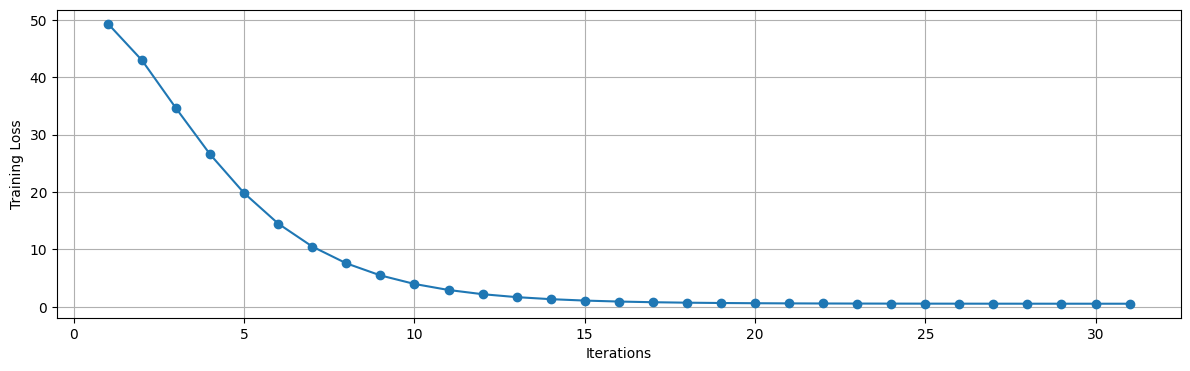

In [ ]:
plot_training_loss(J_list)

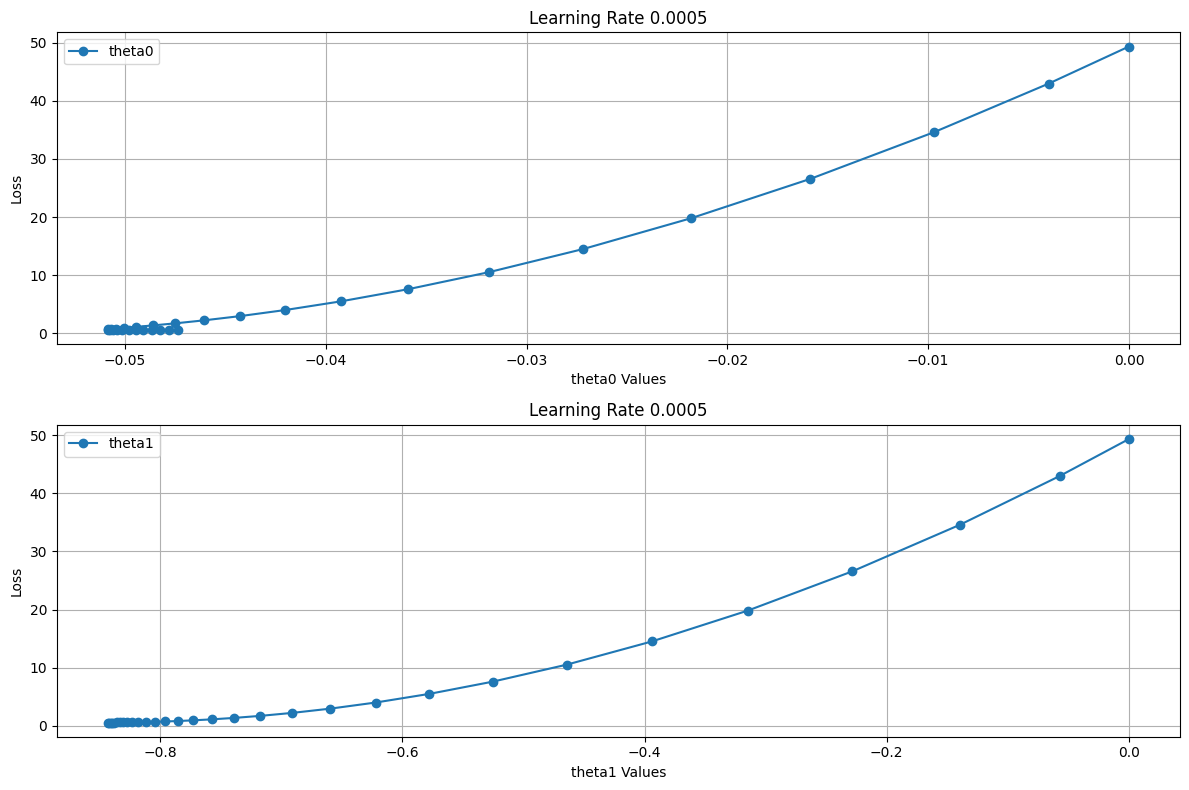

In [ ]:
plot_thetas(thetas_dict , J_list , 0.0005)

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.05 , max_epochs = 500, epsilon = 1e-8 , beta1 = 0.2 , beta2 = 0.7 )

# Train the model
J_list , thetas_dict , thetas_Opt , iterations, Epochs , y_predict = optimizer_instance.train(X_1, y_1)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 49.346938775510196

****************** Epoch 1 ********************

j = 43.40686224583205

****************** Epoch 2 ********************

j = 37.945364997955274

****************** Epoch 3 ********************

j = 32.96770817954375

****************** Epoch 4 ********************

j = 28.454111077441603

****************** Epoch 5 ********************

j = 24.37732534007343

****************** Epoch 6 ********************

j = 20.710532958850017

****************** Epoch 7 ********************

j = 17.429520321856295

****************** Epoch 8 ********************

j = 14.512754819592846

****************** Epoch 9 ********************

j = 11.94086075401479

****************** Epoch 10 ********************

j = 9.695958166262173

****************** Epoch 11 ********************

j = 7.760983043729592

****************** Epoch 12 ********************

j = 6.119007988365005

****************** Epoch 13 ********************

j = 4

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.005 , max_epochs = 500, epsilon = 1e-8 , beta1 = 0.5 , beta2 = 0.8 )

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs, y_predict = optimizer_instance.train(X_1, y_1)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 49.346938775510196

****************** Epoch 1 ********************

j = 48.735415561323826

****************** Epoch 2 ********************

j = 48.12821622934339

****************** Epoch 3 ********************

j = 47.525563388349475

****************** Epoch 4 ********************

j = 46.92760639390063

****************** Epoch 5 ********************

j = 46.33442151438589

****************** Epoch 6 ********************

j = 45.74602369686081

****************** Epoch 7 ********************

j = 45.16238307826075

****************** Epoch 8 ********************

j = 44.58344103612396

****************** Epoch 9 ********************

j = 44.00912317484458

****************** Epoch 10 ********************

j = 43.43934865236166

****************** Epoch 11 ********************

j = 42.87403630130149

****************** Epoch 12 ********************

j = 42.31310833213326

****************** Epoch 13 ********************

j = 41.7

### Train a Linear Regression Model on [`Dummy Marketing and Sales Data`](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

In [ ]:
# Read Dataset
df = pd.read_csv('Dummy Data HSS.csv')
df.head()

TV      Radio  Social Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181

In [ ]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Sales'], axis=1), df['Sales'], test_size = 0.4 , random_state = 42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Influencer' in the training set
X_train['Influencer'] = label_encoder.fit_transform(X_train['Influencer'])

# Transform 'Influencer' in the test set using the same encoder
X_test['Influencer'] = label_encoder.transform(X_test['Influencer'])

# Convert to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

In [ ]:
# Scaling Features
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)


#### Scenario 1

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.00001 , max_epochs = 100 , gamma = 0.9)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs, y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 22944.117672359822

****************** Epoch 1 ********************

j = 21127.143961113605

****************** Epoch 2 ********************

j = 17947.8010331355

****************** Epoch 3 ********************

j = 13998.165531616443

****************** Epoch 4 ********************

j = 9889.96830000765

****************** Epoch 5 ********************

j = 6156.340183481916

****************** Epoch 6 ********************

j = 3184.3279997781706

****************** Epoch 7 ********************

j = 1182.580733912039

****************** Epoch 8 ********************

j = 182.4236303475379

****************** Epoch 9 ********************

j = 65.80099239130222

****************** Epoch 10 ********************

j = 610.7227910530505

****************** Epoch 11 ********************

j = 1543.9690374860425

****************** Epoch 12 ********************

j = 2591.6500148508544

****************** Epoch 13 ********************

j = 352

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.9967098625629952


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.9967854074638054


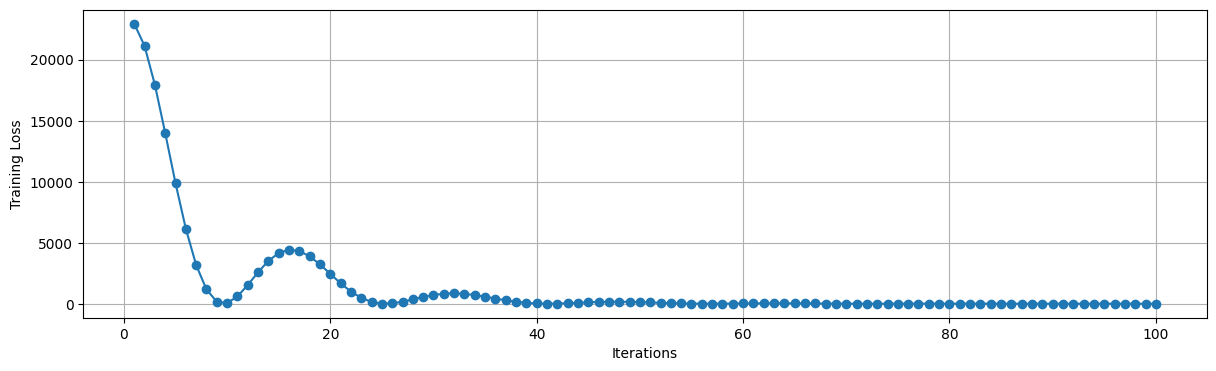

In [ ]:
plot_training_loss(J_list)

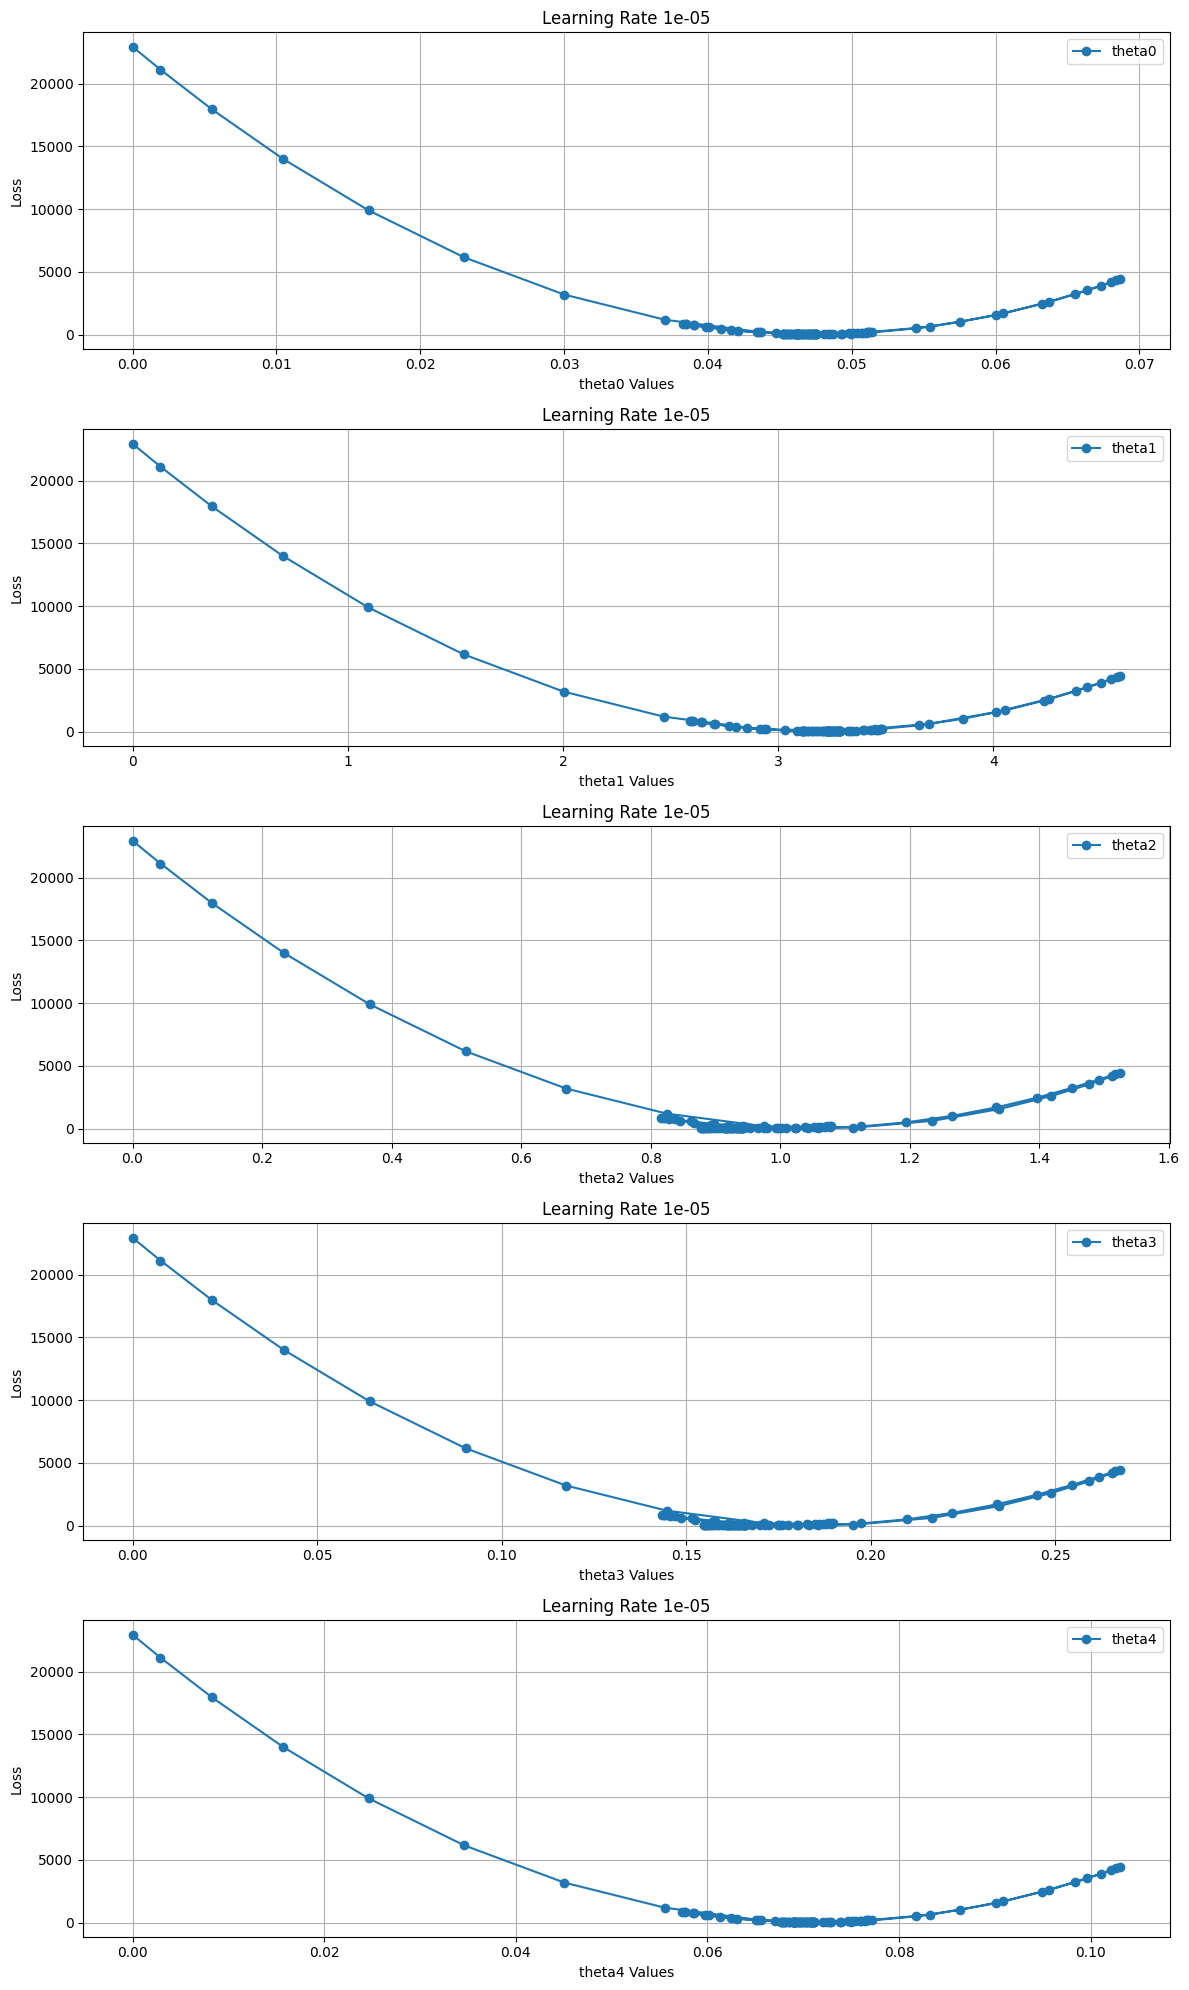

In [ ]:
plot_thetas(thetas_dict , J_list , 0.00001 )

#### Scenario 2

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.00001 , max_epochs = 100 , gamma = 0.9, batch_size = 500)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs, y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 22280.814798151572

j = 22153.325652914

j = 18056.647531002345

j = 13993.781732465714

j = 9614.449138202222

j = 6117.498299953913

****************** Epoch 1 ********************

j = 3058.306096839464

j = 1225.771344265259

j = 179.07904383814747

j = 65.13293635045514

j = 606.4030313412558

j = 1567.7915441409195

****************** Epoch 2 ********************

j = 2546.8094798462585

j = 3701.031409132309

j = 4196.158432002574

j = 4397.568494239236

j = 4227.955293827766

j = 3914.9762725729784

****************** Epoch 3 ********************

j = 3153.153773030124

j = 2568.9030106578225

j = 1688.3492374443317

j = 986.6967225262488

j = 478.53887496462465

j = 164.78711379140336

****************** Epoch 4 ********************

j = 25.703328425542804

j = 48.43400902497355

j = 180.0925130028866

j = 377.57482316215857

j = 554.3674370807994

j = 725.0011573485651

****************** Epoch 5 ********************

j = 8

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.99677893423822


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.9969147533163012


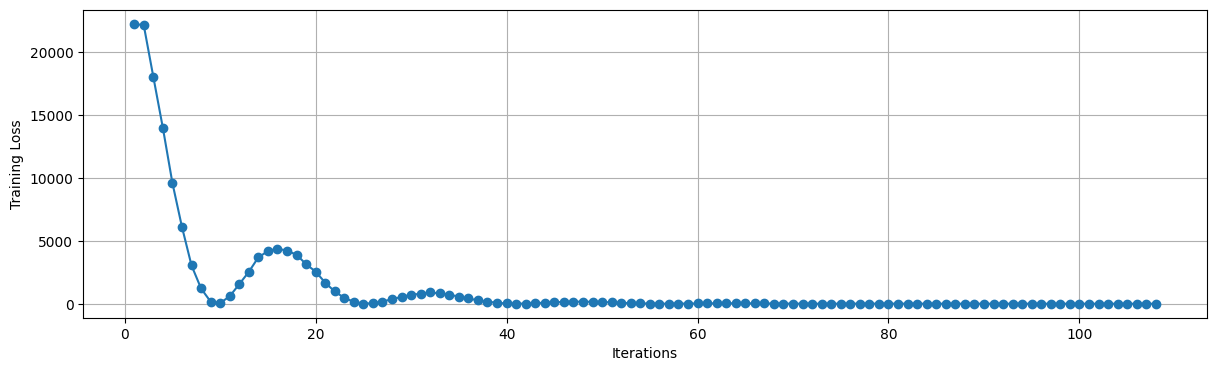

In [ ]:
plot_training_loss(J_list)

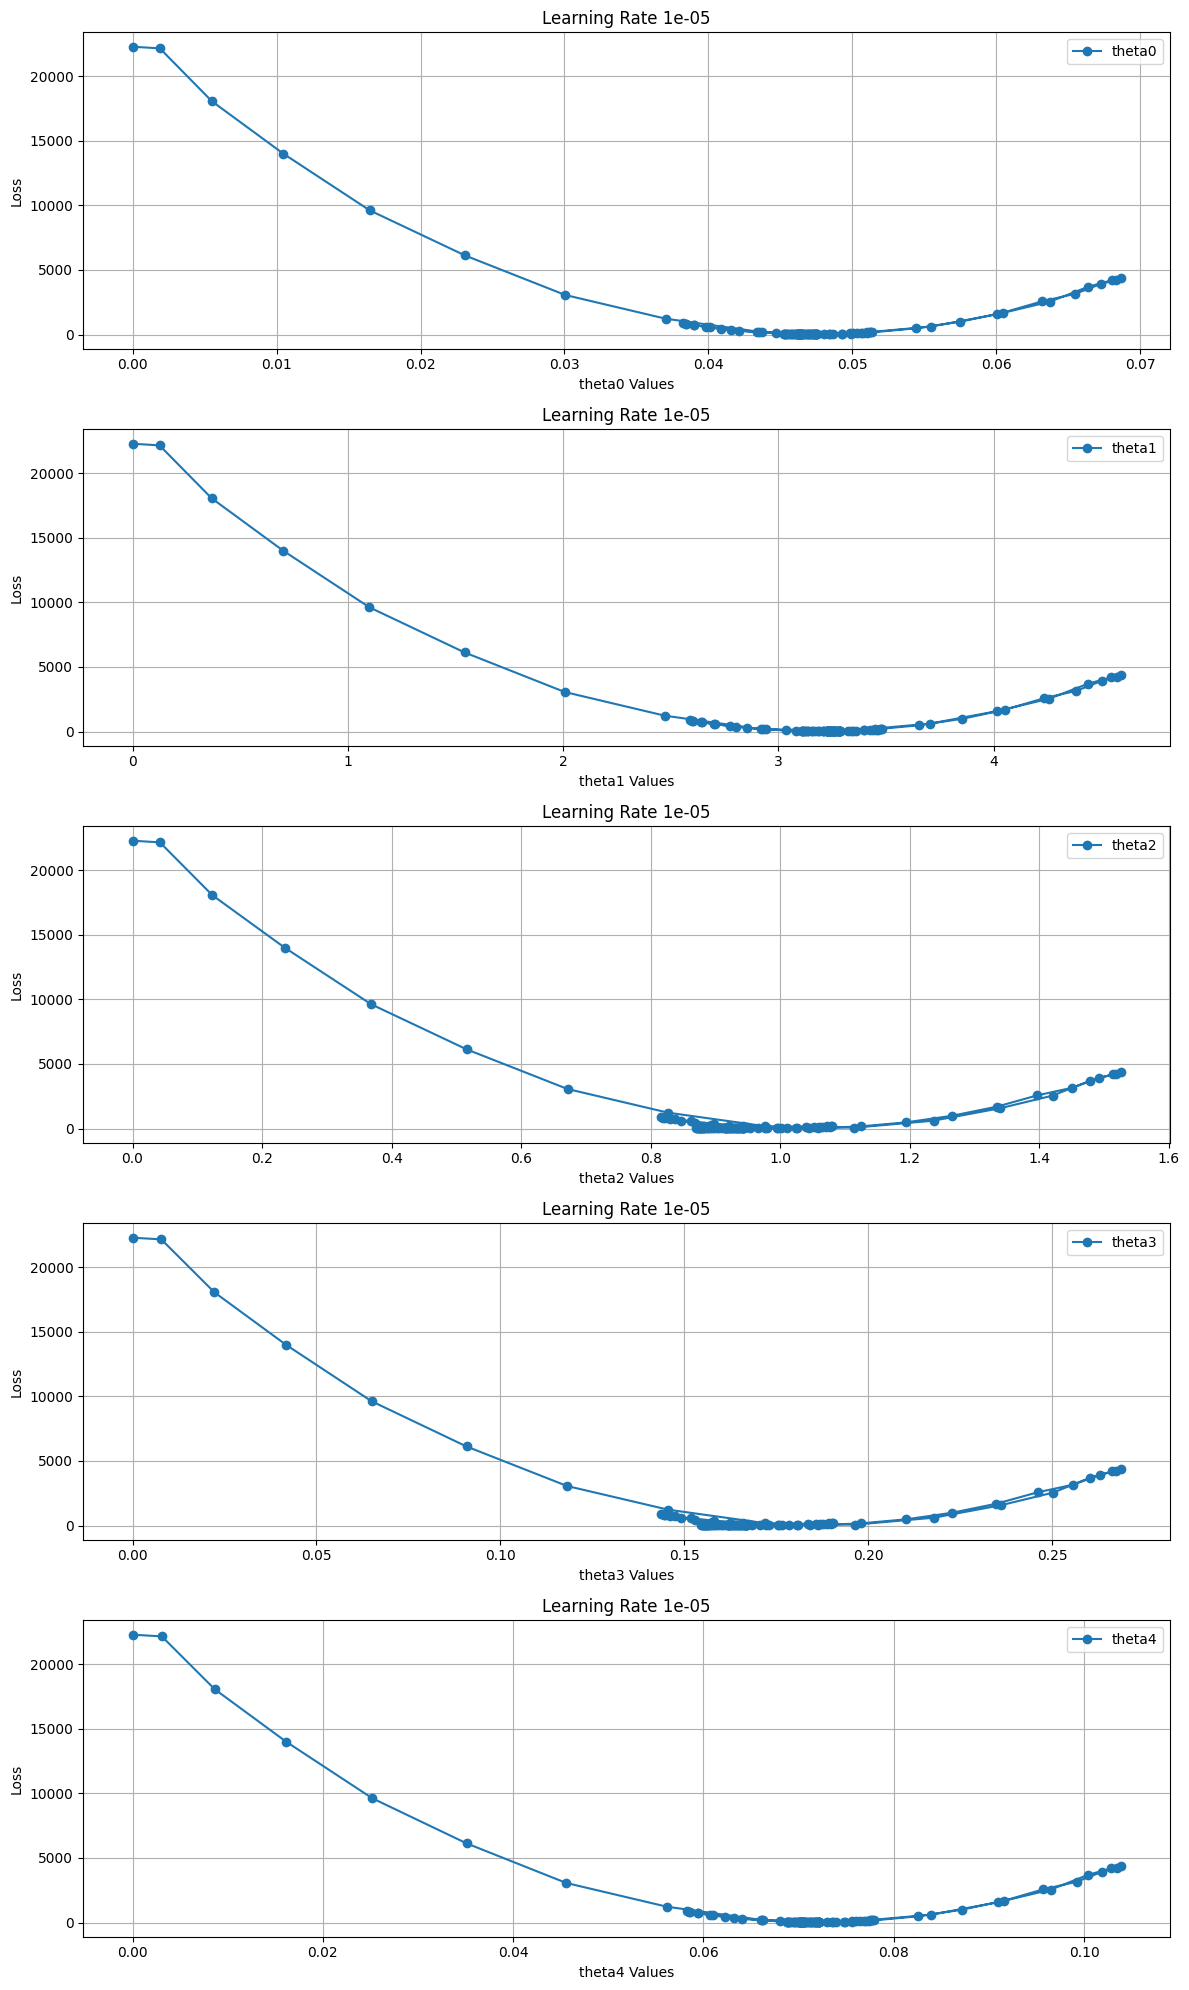

In [ ]:
plot_thetas(thetas_dict , J_list , 0.00001 )

- Mini-batch reached a smaller cost value compared to batch for the same number of Epochs, but it also took more iterations than batch.

#### Scenario 3

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.00001 , max_epochs = 100 , gamma = 0.9, batch_size = 1)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations, Epochs , y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


Streaming output truncated to the last 5000 lines.

j = 4.866938876396006

j = 0.20771999766585483

j = 0.003075008520423934

j = 0.13459361957416013

j = 9.497117796131217

j = 0.9987054180263946

j = 7.434895879840828

j = 1.1285442283664002

j = 20.45196728514541

j = 1.672025411512767

j = 23.14536534448016

j = 1.4349770901733427

j = 1.933916764586847

j = 11.3700662729002

j = 0.9592916640911833

j = 5.510647502881732

j = 1.2673205406075203

j = 0.2561905606305213

j = 4.940683563447408

j = 0.11904421166515408

j = 4.04706550598957

j = 9.059155473515744

j = 22.252185723557112

j = 0.009490330189981334

j = 0.021757393384977695

j = 12.167463189542051

j = 3.456988143631793

j = 0.017452755826762395

j = 14.93440072418911

j = 0.5025889741770204

j = 5.619860483086772

j = 7.72463809183898

j = 2.6198038582755374

j = 1.9422730105918047

j = 0.9043637440017244

j = 0.018357660336555576

j = 0.7990167022312942

j = 0.9860947900070852

j = 2.2277219116248976

j = 24.45611298498

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.9989848359519831


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.9990041547780123


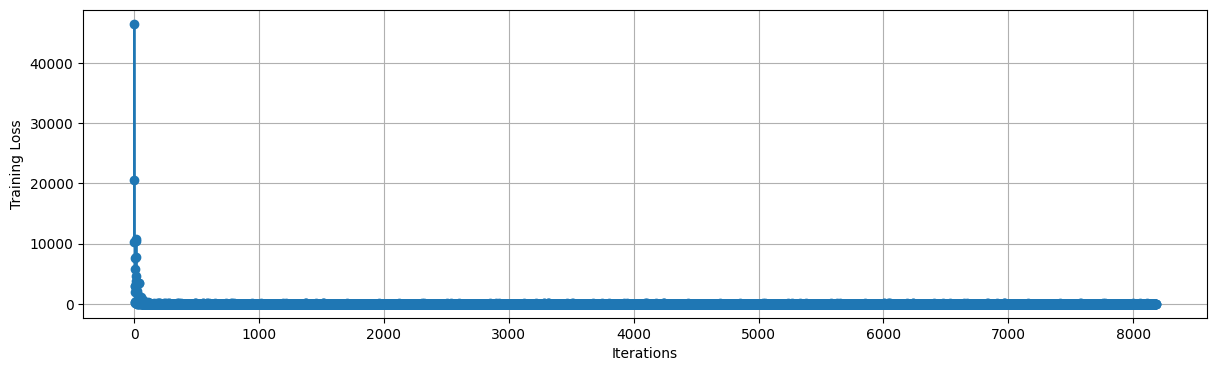

In [ ]:
plot_training_loss(J_list)

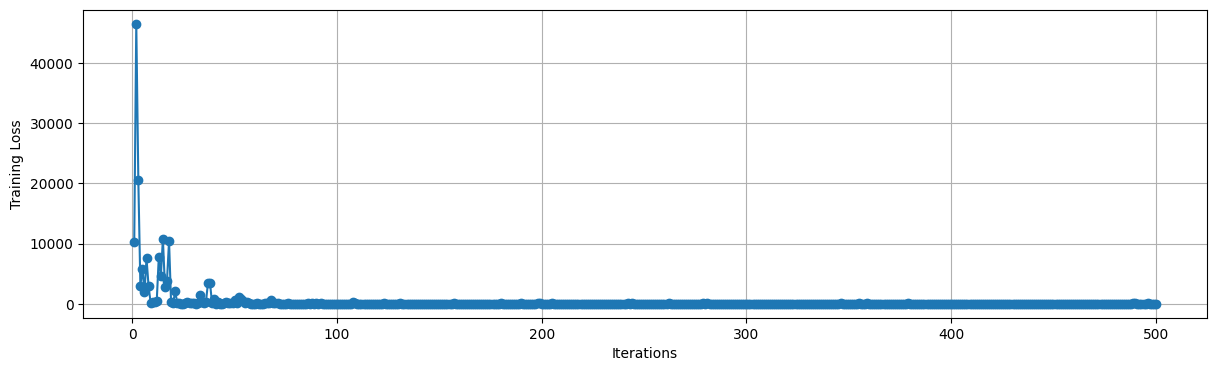

In [ ]:
# Zooming in
plot_training_loss(J_list[0:500])

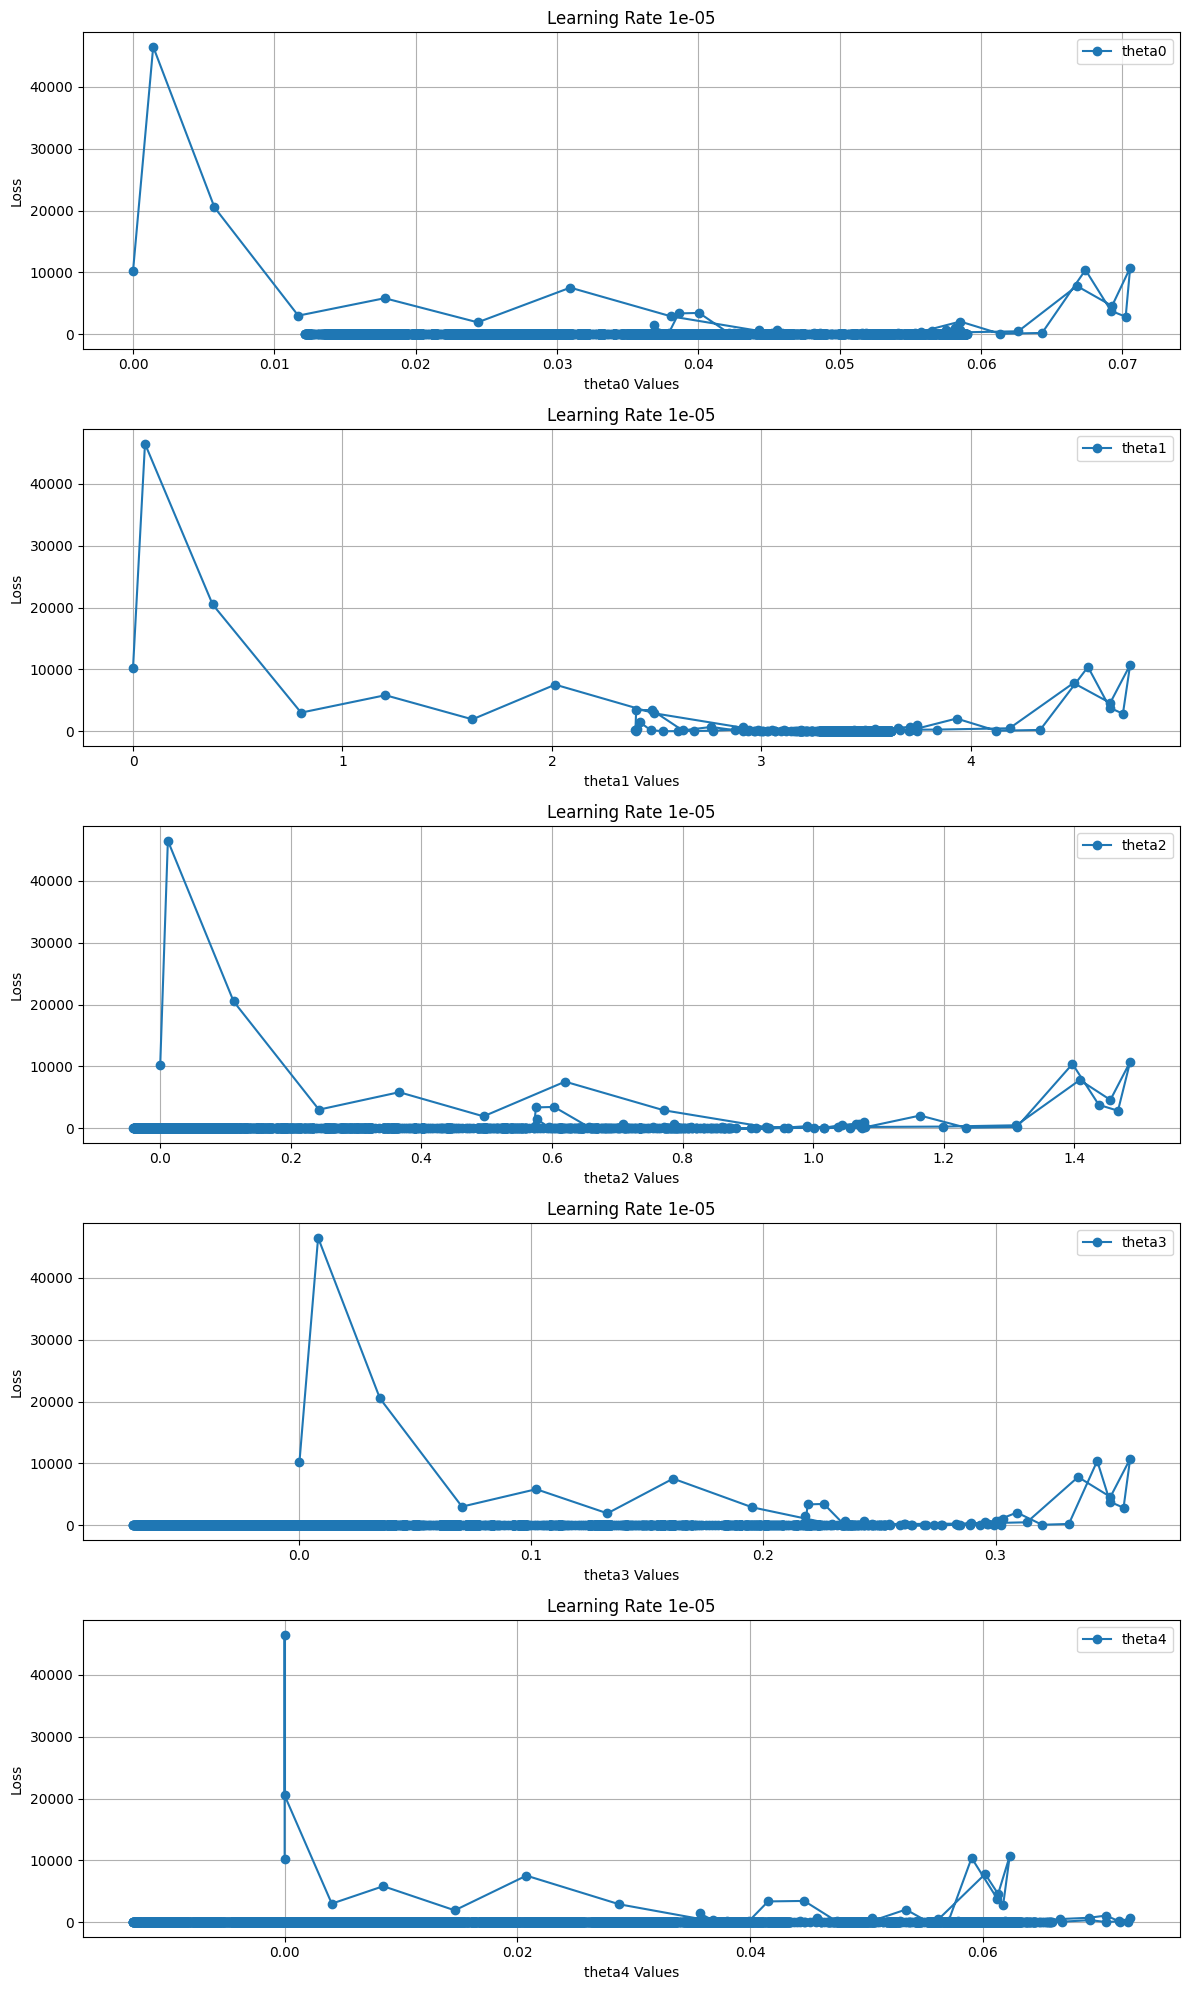

In [ ]:
plot_thetas(thetas_dict , J_list , 0.00001)

-  Stochastic took only 3 epochs to converge and got a comparable cost value with mini-batch (size 500) and batch.
- There are more fluctuations in the values of thetas compared to the other two.

#### Scenario 4

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.00001 , max_epochs = 100 , gamma = 0.2)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations, Epochs , y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 22944.117672359822

****************** Epoch 1 ********************

j = 21127.143961113605

****************** Epoch 2 ********************

j = 19114.17418811552

****************** Epoch 3 ********************

j = 17226.12482488631

****************** Epoch 4 ********************

j = 15511.385540567746

****************** Epoch 5 ********************

j = 13964.84729757586

****************** Epoch 6 ********************

j = 12572.152751348762

****************** Epoch 7 ********************

j = 11318.425606473282

****************** Epoch 8 ********************

j = 10189.884664972265

****************** Epoch 9 ********************

j = 9174.04694934629

****************** Epoch 10 ********************

j = 8259.660548097465

****************** Epoch 11 ********************

j = 7436.594167755581

****************** Epoch 12 ********************

j = 6695.727715336559

****************** Epoch 13 ********************

j = 60

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.9956977912322417


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.995779984886085


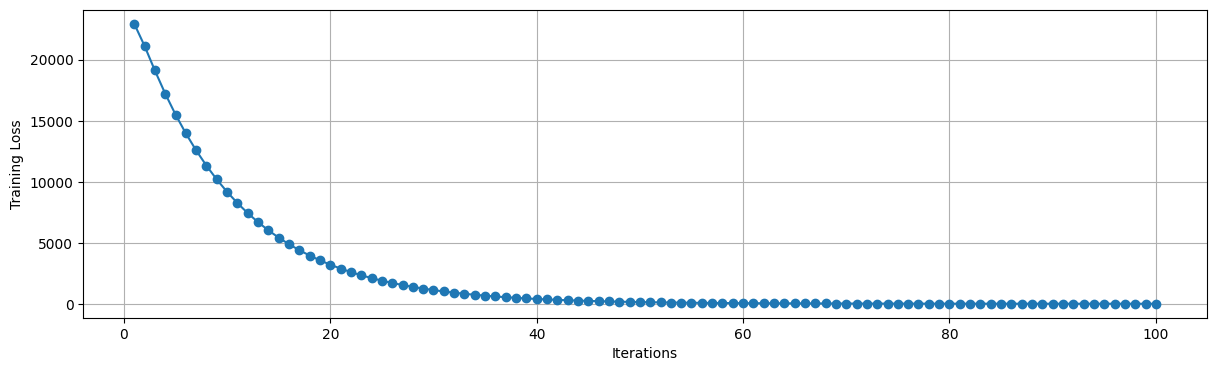

In [ ]:
plot_training_loss(J_list)

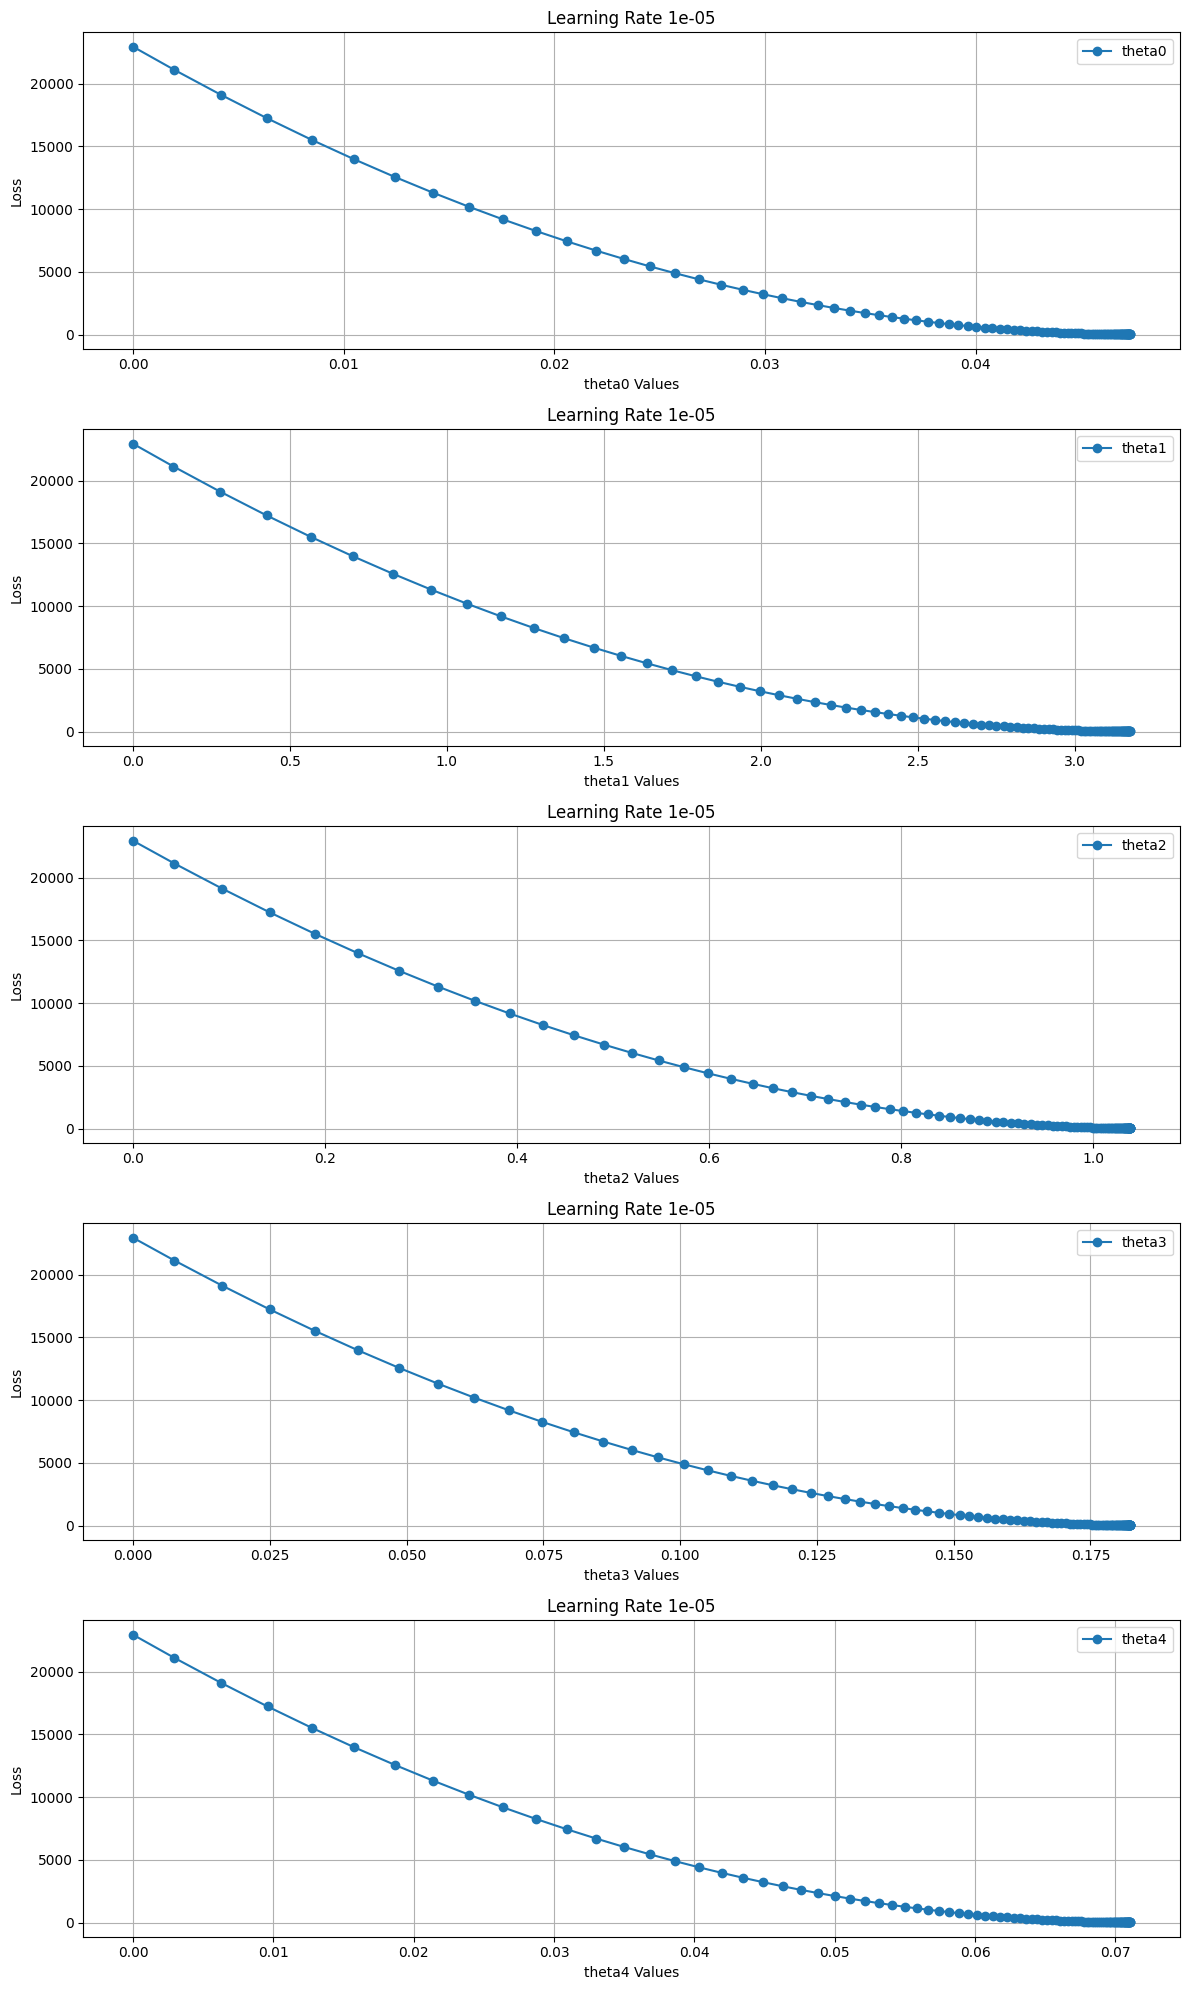

In [ ]:
plot_thetas(thetas_dict , J_list , 0.00001)

- Decreasing gamma made the optimization more stable as can be seen from the "Loss vs Iterations curve".

#### Scenario 5

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.005 , max_epochs = 500 , epsilon = 1e-8 , beta1 = 0.2 , beta2 = 0.7 )

# Train the model
J_list , thetas_dict , thetas_Opt , iterations, Epochs , y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 22944.117672359822

****************** Epoch 1 ********************

j = 22851.994716653815

****************** Epoch 2 ********************

j = 22760.103623165905

****************** Epoch 3 ********************

j = 22668.453716937955

****************** Epoch 4 ********************

j = 22577.042639501502

****************** Epoch 5 ********************

j = 22485.86360293542

****************** Epoch 6 ********************

j = 22394.909050840055

****************** Epoch 7 ********************

j = 22304.171956513157

****************** Epoch 8 ********************

j = 22213.646182562068

****************** Epoch 9 ********************

j = 22123.32652752136

****************** Epoch 10 ********************

j = 22033.2086693461

****************** Epoch 11 ********************

j = 21943.289072799213

****************** Epoch 12 ********************

j = 21853.56488525709

****************** Epoch 13 ********************

j =

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.9719255351679574


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.9721995424341059


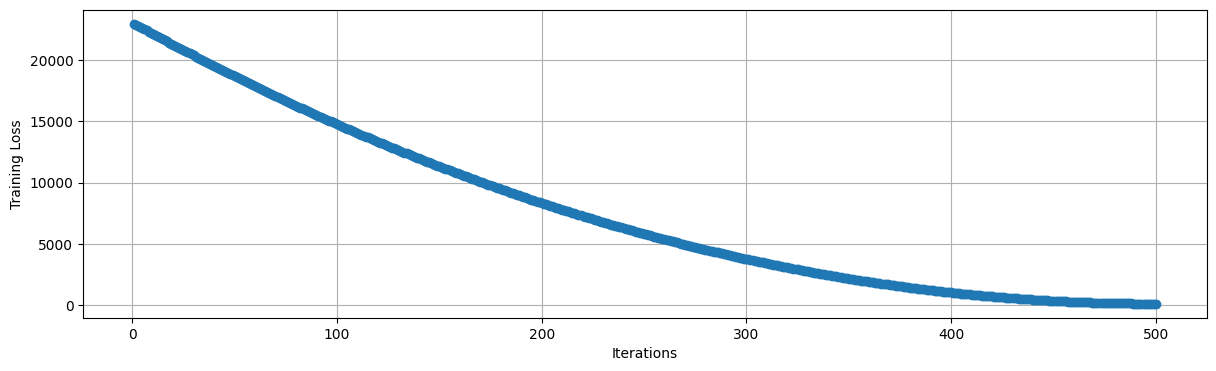

In [ ]:
plot_training_loss(J_list)

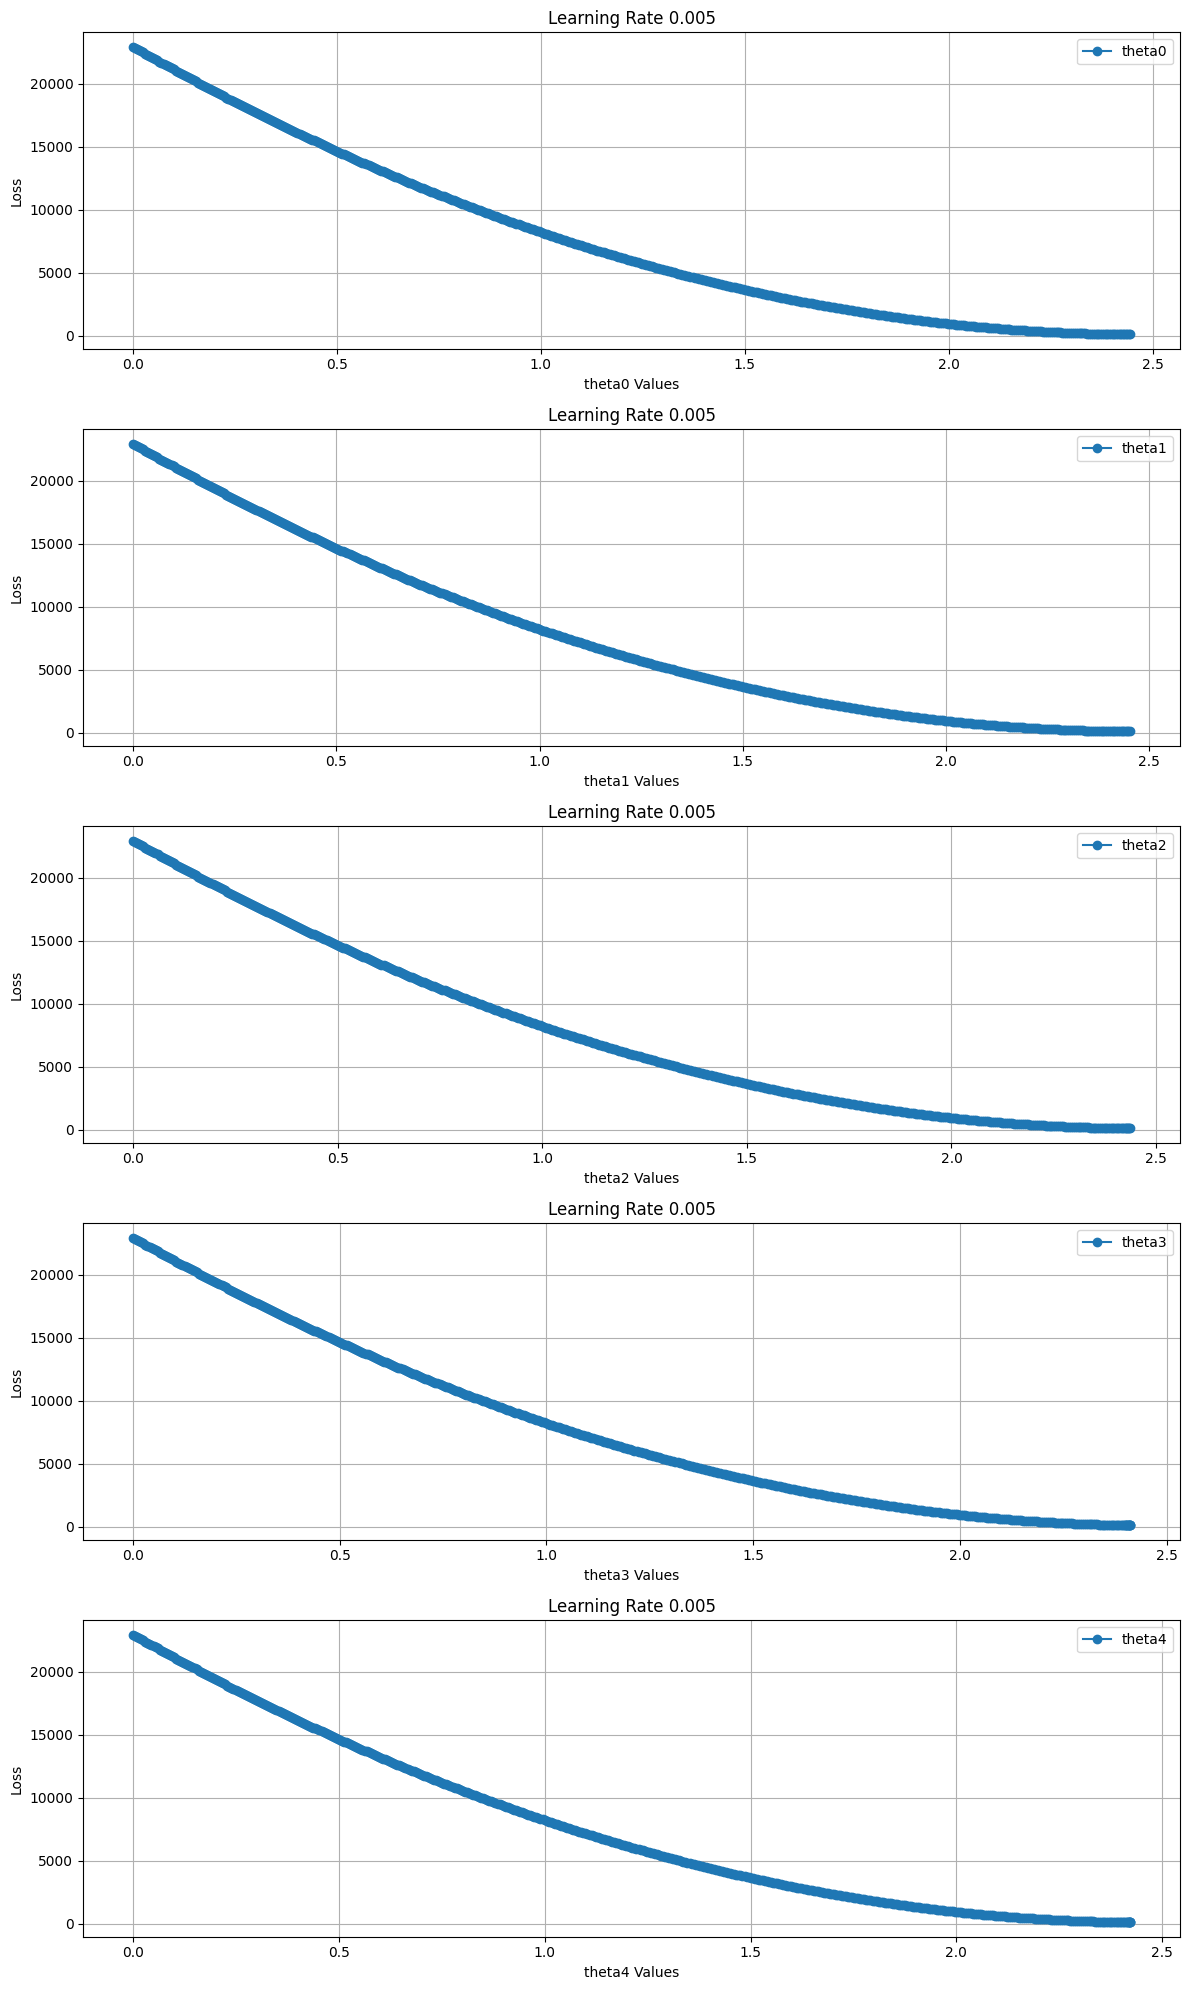

In [ ]:
plot_thetas(thetas_dict , J_list , 0.005)

- Steadily approaching the minimum values for thetas with no oscillations around the values unlike GD with momentum which showed some oscillations around the minimum value.

#### Scenario 6

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.0005 , batch_size = 1 ,
                               max_epochs = 50 , epsilon = 1e-8 , beta1 = 0.2 , beta2 = 0.7)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs , y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


Streaming output truncated to the last 5000 lines.
j = 0.6453701257565487

j = 8.840471289865107

j = 0.38751846052949324

j = 0.1900569090105758

j = 0.09707955557592757

j = 2.7612446356098475

j = 2.8443600151539434

j = 3.8767852770319706

j = 2.299109391537381

j = 9.675250587779294

j = 4.198092930302095

j = 9.254835678399626

j = 1.5150141484618707

j = 1.4786603761609953

j = 6.057006848119994

j = 0.660879525226028

j = 4.5187373794875185

j = 1.9866078032462104

j = 0.02030599501229821

j = 0.26495024968831865

j = 0.268794961481253

j = 8.644488545009585

j = 3.1083698271768343

j = 1.3098494967620213

j = 1.189511423154405

j = 1.0707910557041442

j = 3.1376649230167613

j = 11.329214745668192

j = 0.5784561529932355

j = 8.538835906324586

j = 1.6911059211380672

j = 1.0684949475221404

j = 4.3284847050127775

j = 4.6894497268872835

j = 1.9380988282625318

j = 0.5318284856082729

j = 0.21914041274349375

j = 0.07355247369027558

j = 0.7202892020415443

j = 7.259533096860

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.9989792834454635


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.9989954149897368


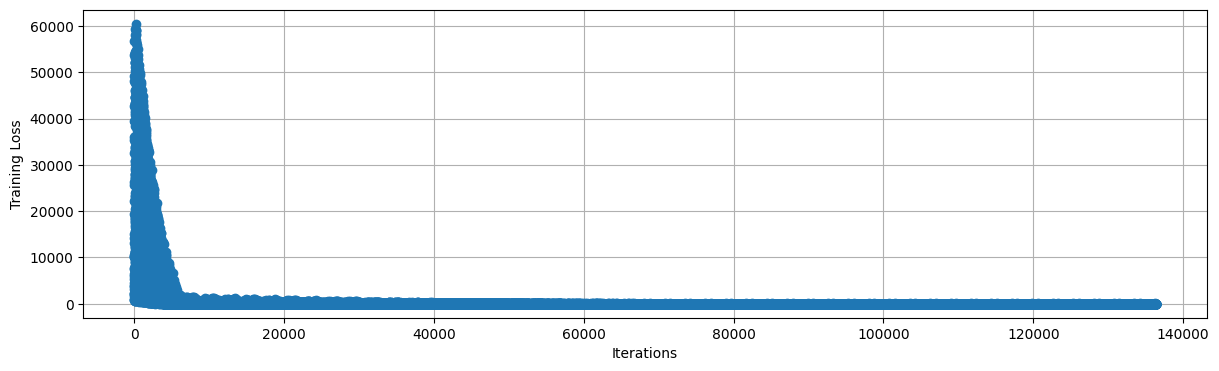

In [ ]:
plot_training_loss(J_list)

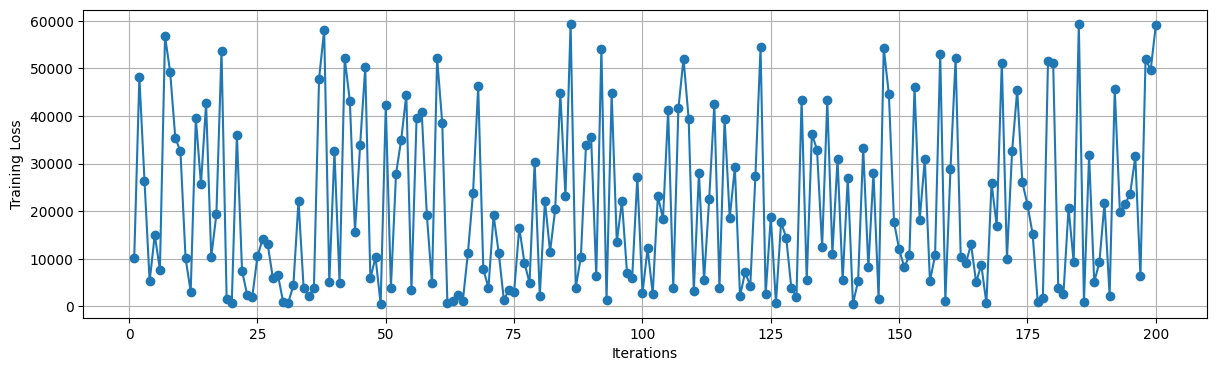

In [ ]:
# Zoming In
plot_training_loss(J_list[0:200])

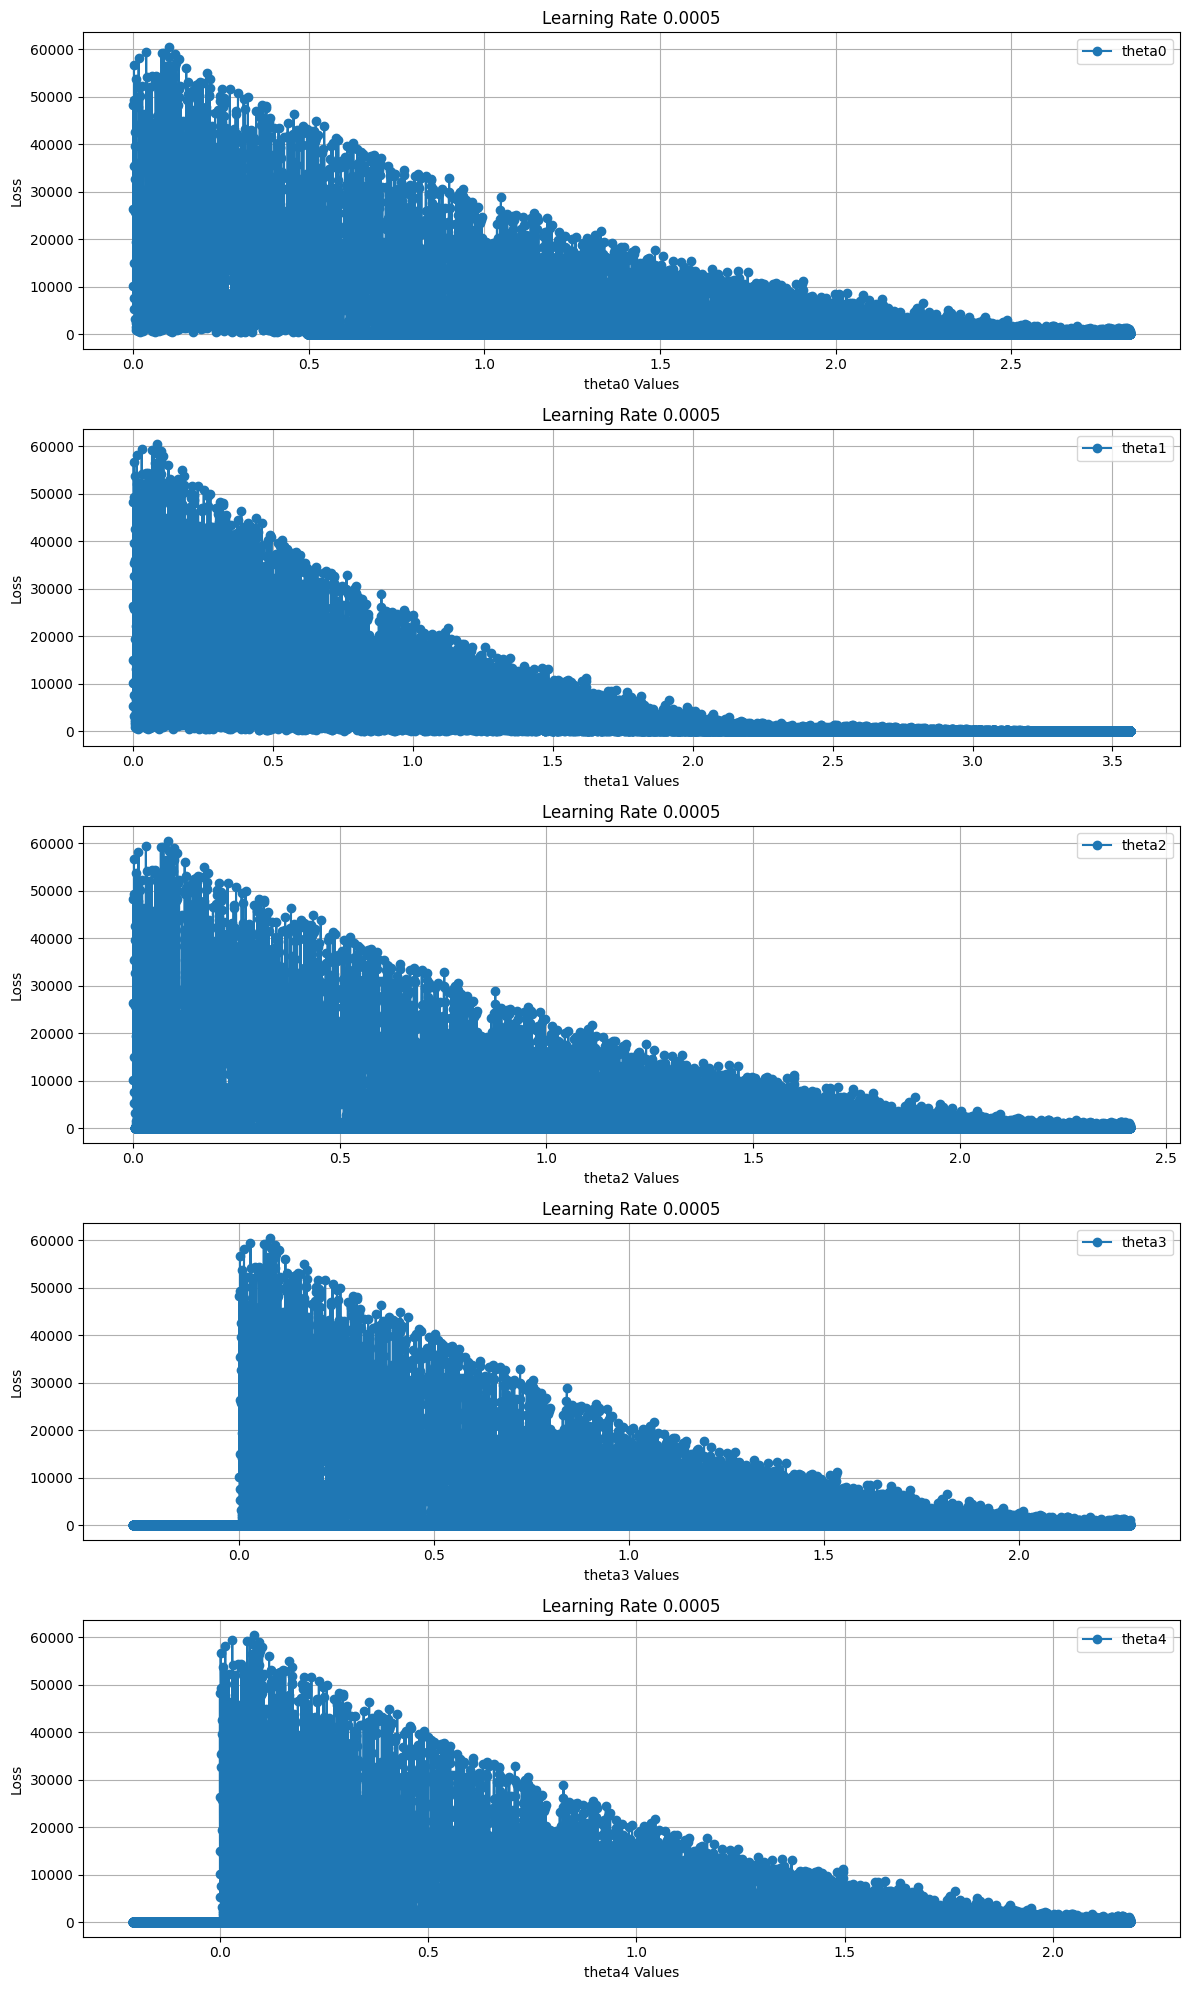

In [ ]:
plot_thetas(thetas_dict , J_list , 0.0005)

- More fluctuations compared to the batch version of the same algorithm. It took a much lower number of Epochs to reach a smaller cost value, however, it took way more iterations.

#### Scenario 7


In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.005 , batch_size = 500  ,
                               max_epochs = 500 , epsilon = 1e-8 , beta1 = 0.2 , beta2 = 0.7)

# Train the model

J_list , thetas_dict , thetas_Opt , iterations , Epochs, y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 22280.814798151572

j = 23905.722105444234

j = 22880.57730173991

j = 22678.62571459687

j = 22045.61029767916

j = 22509.835204068044

****************** Epoch 1 ********************

j = 21744.82883393948

j = 23335.292215893878

j = 22332.161692492078

j = 22136.34968069828

j = 21514.446850287706

j = 21964.770288830205

****************** Epoch 2 ********************

j = 21216.386238645217

j = 22771.758729615405

j = 21790.826809463637

j = 21601.23175123125

j = 20990.337414526293

j = 21426.821550013334

****************** Epoch 3 ********************

j = 20694.78142955942

j = 22215.356232079994

j = 21256.35197027355

j = 21072.8592319351

j = 20472.86711691993

j = 20895.68501012313

****************** Epoch 4 ********************

j = 20179.7882974909

j = 21665.94223899093

j = 20728.609785894314

j = 20551.119736263692

j = 19961.9444827347

j = 20371.292504441564

****************** Epoch 5 ********************

j =

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.998982451715962


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.9989991114253087


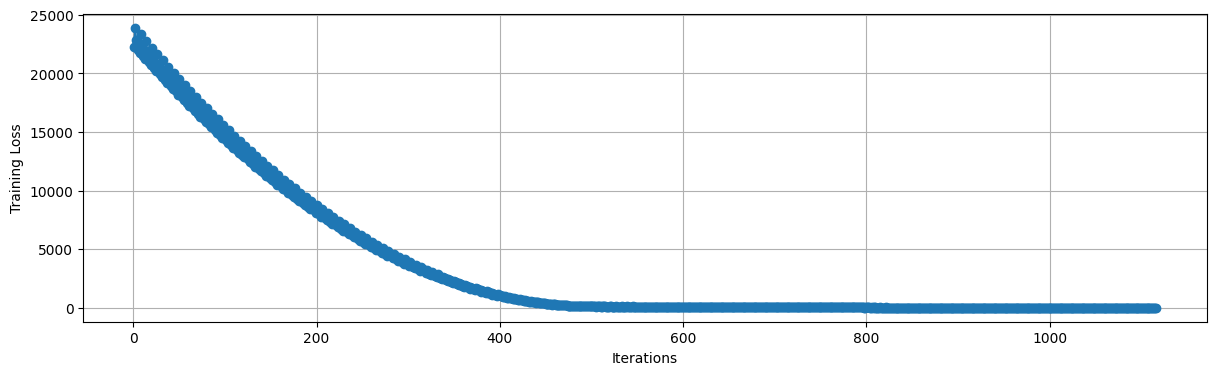

In [ ]:
plot_training_loss(J_list)

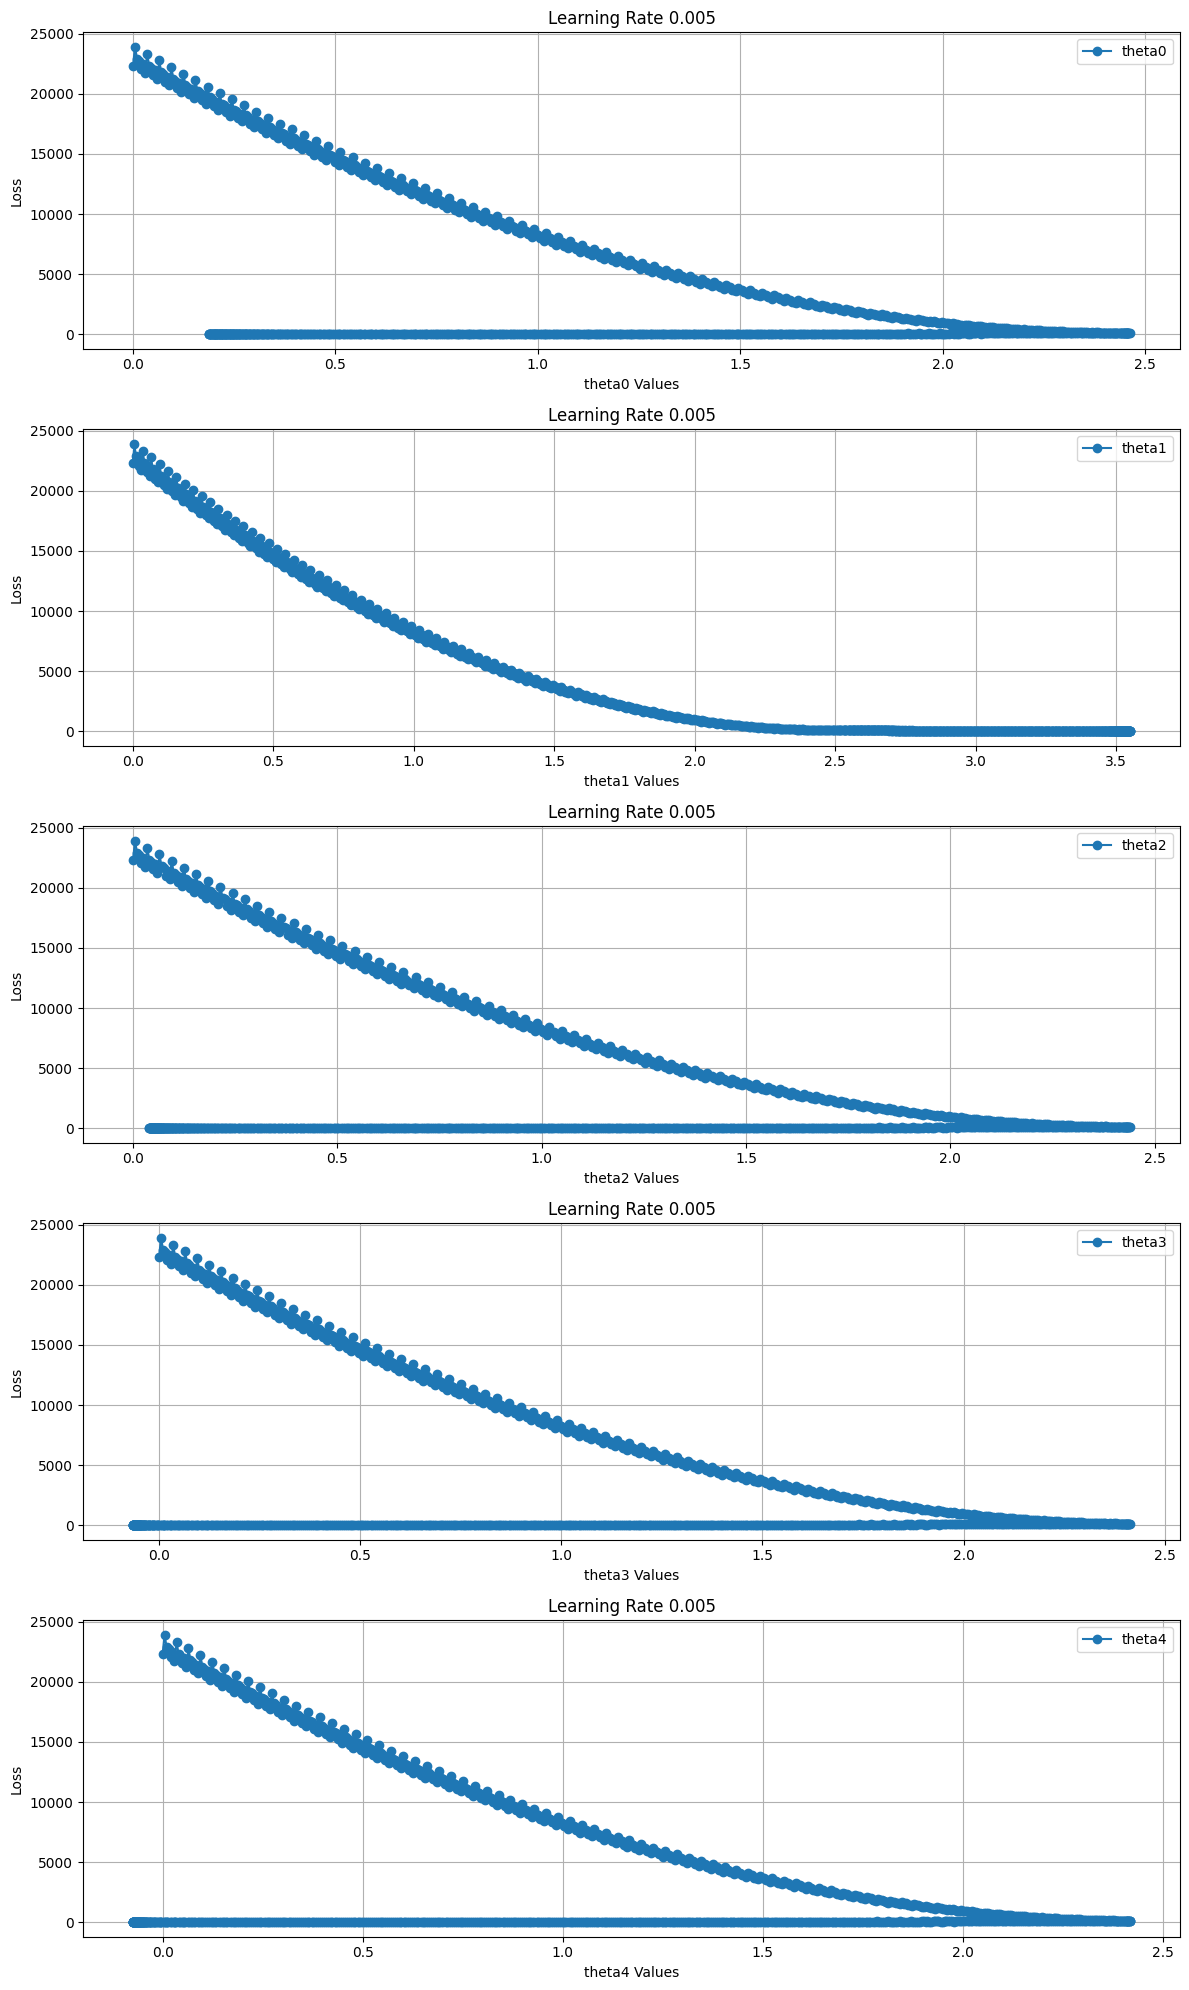

In [ ]:
plot_thetas(thetas_dict , J_list , 0.005)

- An in-between case; fewer fluctuations in the update and fewer number of epochs and iterations for a lower cost value.


#### Scenario 8


In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.005 , max_epochs = 500 , epsilon = 1e-8 , beta1 = 0.9 , beta2 = 0.999 )

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs , y_predict = optimizer_instance.train(X_train, y_train)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 22944.117672359822

****************** Epoch 1 ********************

j = 22851.994716653815

****************** Epoch 2 ********************

j = 22760.06293711082

****************** Epoch 3 ********************

j = 22668.32555693455

****************** Epoch 4 ********************

j = 22576.785764410746

****************** Epoch 5 ********************

j = 22485.446705787643

****************** Epoch 6 ********************

j = 22394.311478402444

****************** Epoch 7 ********************

j = 22303.383124104534

****************** Epoch 8 ********************

j = 22212.664623021647

****************** Epoch 9 ********************

j = 22122.15888771075

****************** Epoch 10 ********************

j = 22031.868757729884

****************** Epoch 11 ********************

j = 21941.79699466166

****************** Epoch 12 ********************

j = 21851.946277613144

****************** Epoch 13 ********************

j 

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.6263027082261587


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test)
print(f'r2_score: {r2_score(y_test , y_test_predict)}')

r2_score: 0.6320050858869364


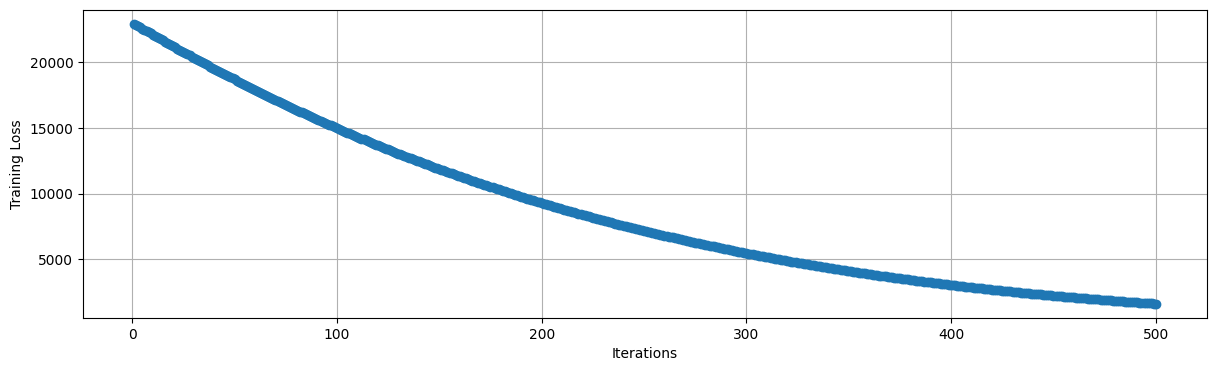

In [ ]:
plot_training_loss(J_list)

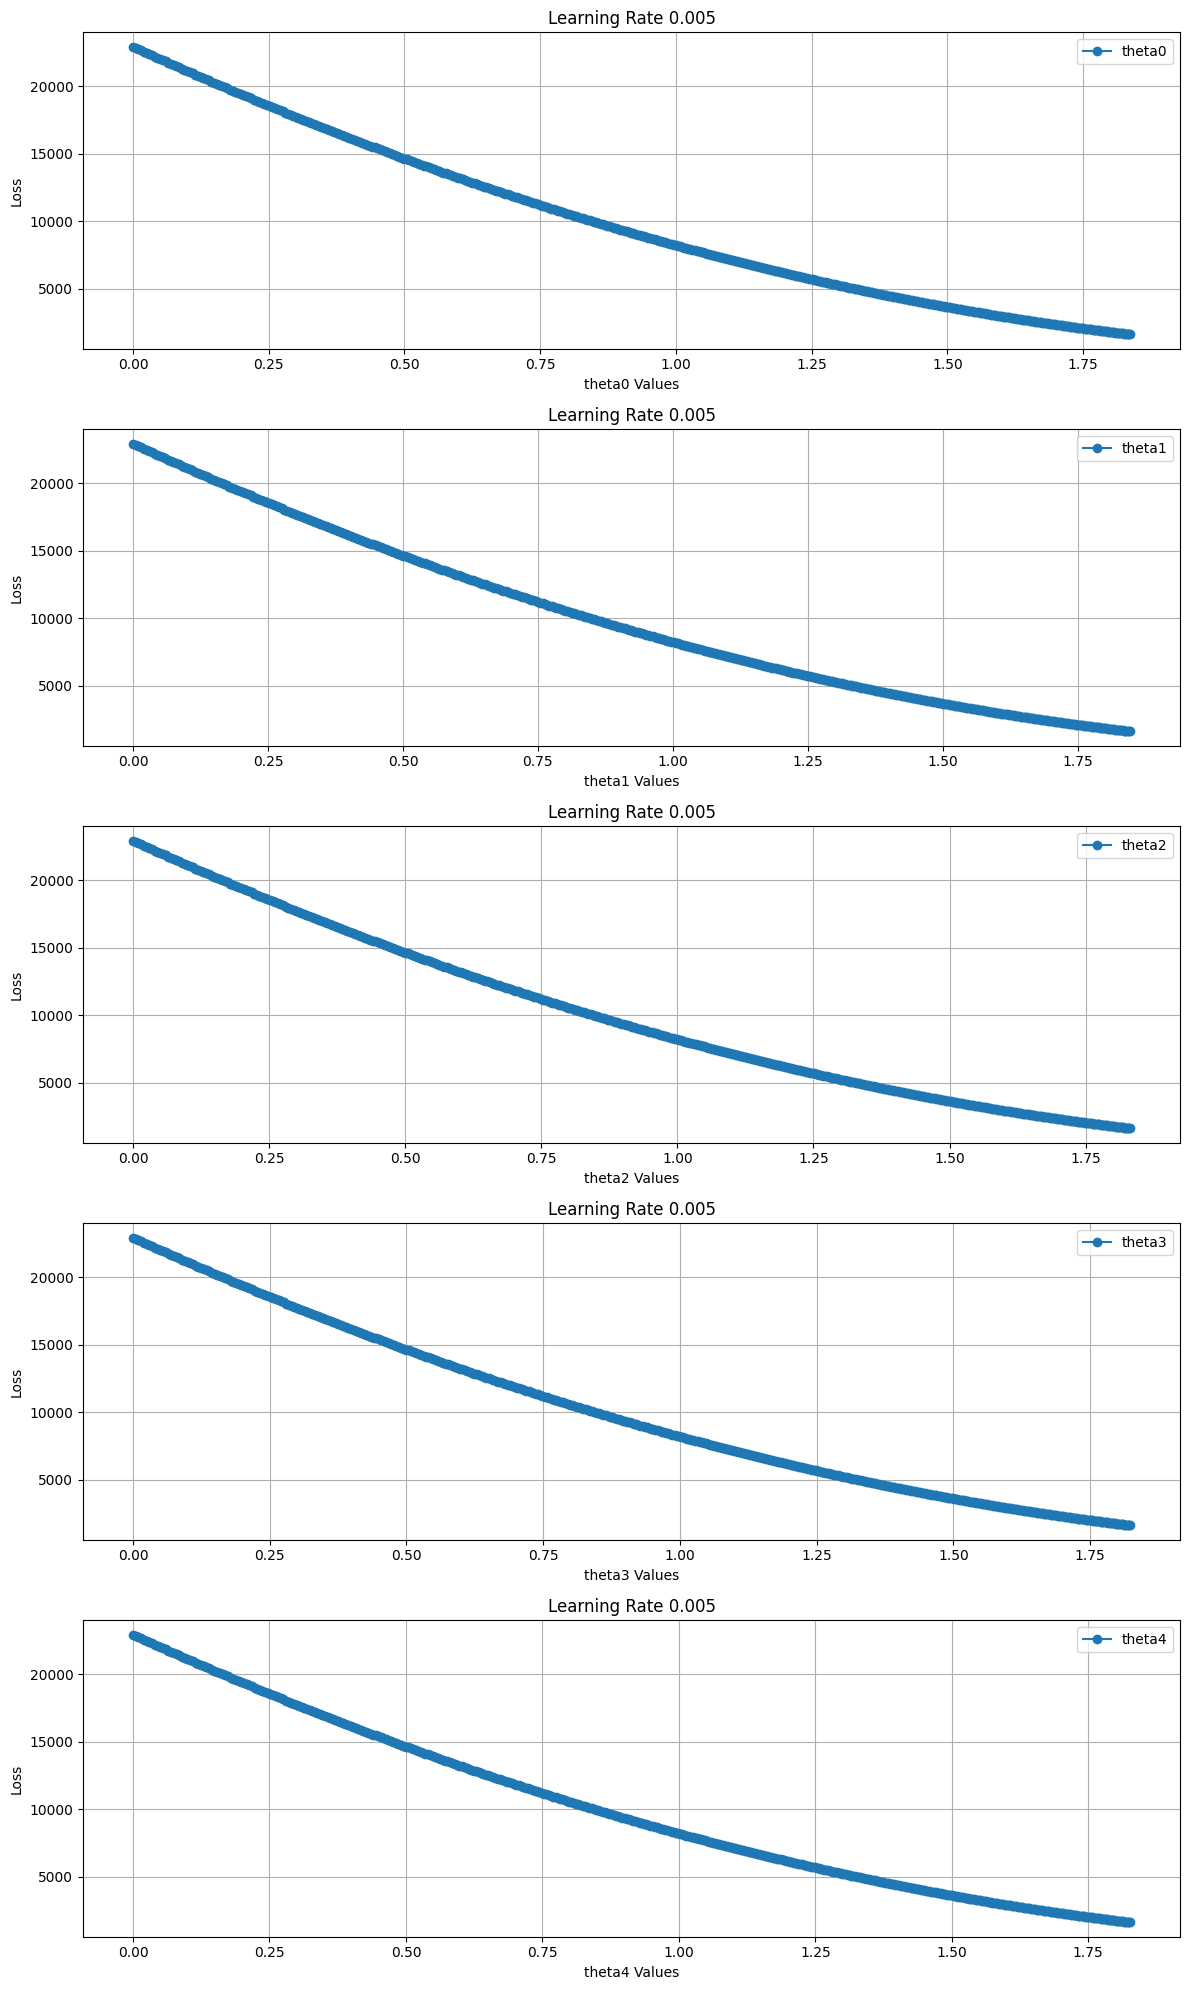

In [ ]:
plot_thetas(thetas_dict , J_list , 0.005)

- Increaing the values for beta1 and beta2 resulted in a slower update and movement toward the minimum of the cost function.

### Second Order Optimizer Class

In [ ]:
# Class Definition

class BFGS_Optimizeer:

  def __init__(self , epsilon =  1e-8 , max_iterations = 1000, lr = 1):
    self.lr = lr
    self.epsilon = epsilon
    self.max_iterations = max_iterations


  def train( self , X , y):

    self.X = X
    self.y = y

    X_augmented = np.column_stack(( np.ones(X.shape[0]) , X ))
    y = y.reshape(-1,1)

    # Initialize thetas randomly
    theta_k = np.random.randn(X_augmented.shape[1], 1) * 0.1
    theta_k_1 = np.random.randn(X_augmented.shape[1], 1) * 0.1

    iteration = 1

    h_x = np.matmul(X_augmented , theta_k_1)
    err_vector = h_x - y
    len_err_vector = len(err_vector)
    gk_1 = np.matmul(X_augmented.T , err_vector)/len_err_vector

    Bk_inv = I = np.eye(theta_k.shape[0])


    while iteration < self.max_iterations:

      delta_theta = theta_k - theta_k_1
      h_x = np.matmul(X_augmented , theta_k)
      err_vector = h_x - y
      gk = np.matmul(X_augmented.T , err_vector)/len_err_vector

      if np.linalg.norm(gk) < self.epsilon:
        break
      yk = gk - gk_1

      first_bracket = I - (delta_theta @ yk.T)/(yk.T @ delta_theta)
      second_bracket = I - (yk @ delta_theta.T)/(yk.T @ delta_theta)
      third_bracket = (delta_theta @ delta_theta.T)/(yk.T @ delta_theta)
      Bk_inv = first_bracket @ Bk_inv @ second_bracket + third_bracket

      theta_k_1 = theta_k
      theta_k = theta_k - self.lr * Bk_inv @ gk
      gk_1 = gk
      iteration += 1

    return theta_k, gk, iteration




In [ ]:
# Define an Instance of the Optimizer
bfgs_optimizer_instance = BFGS_Optimizeer(epsilon = 0.001 , max_iterations = 500)

# Train Optimizer
theta_k, gk, iteration = bfgs_optimizer_instance.train(X_1 , y_1 )

print("****************** Training Report ********************")
print(f"\nBFGS converged after {iteration} Iterations \n")
print(f"thetas_Opt\n : {theta_k}")
print(f"\nGradient Norm = {np.linalg.norm(gk)}\n")


****************** Training Report ********************

BFGS converged after 5 Iterations 

thetas_Opt
 : [[ 2.00000013]
 [-1.00000022]]

Gradient Norm = 2.8959027728300364e-05



### Train a Linear Regression Model on [`Dummy Marketing and Sales Data`](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

In [ ]:
# Define an Instance of the Optimizer
bfgs_optimizer_instance = BFGS_Optimizeer(epsilon = 0.001 , max_iterations = 500)

# Train Optimizer
theta_k, gk, iteration = bfgs_optimizer_instance.train(X_train , y_train )

print("****************** Training Report ********************")
print(f"\nBFGS converged after {iteration} Iterations \n")
print(f"thetas_Opt\n : {theta_k}")
print(f"\nGradient Norm = {np.linalg.norm(gk)}\n")


****************** Training Report ********************

BFGS converged after 17 Iterations 

thetas_Opt
 : [[-0.16864078]
 [ 3.56290984]
 [ 0.00650524]
 [-0.04249882]
 [-0.03116266]]

Gradient Norm = 0.00067698482902783



In [ ]:
X_augmented = np.column_stack(( np.ones(X_train.shape[0]) , X_train ))
y_predict = np.matmul(X_augmented , theta_k)
print(f'r2_score: {r2_score(y_train , y_predict)}')

r2_score: 0.9989875321666274


In [ ]:
X_augmented = np.column_stack(( np.ones(X_test.shape[0]) , X_test ))
y_predict = np.matmul(X_augmented , theta_k)
print(f'r2_score: {r2_score(y_test , y_predict)}')

r2_score: 0.9990032273564615


- BFGS took only 13 iterations to reach the optimal values for thetas and it got a very good performance on both train and test datasets. It is much faster compared to First order opimizations.

### Train a Linear Regression Model on [`Car Purchasing Model`](https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model/data)

In [ ]:
# Read Dataset
df_cars = pd.read_csv('Car_Purchasing_Data.csv')
df_cars.head()

Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [ ]:
df_cars.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [ ]:
df_cars = df_cars.drop(['Customer Name','Customer e-mail','Country'], axis = 1)

In [ ]:
# Split the data into training and testing sets
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(df_cars.drop(['Car Purchase Amount'], axis=1), df_cars['Car Purchase Amount'],
                                                                        test_size = 0.4 , random_state = 42)

# Convert to NumPy arrays
X_train_cars = X_train_cars.to_numpy()
X_test_cars = X_test_cars.to_numpy()
y_train_cars = y_train_cars.to_numpy()
y_test_cars = y_test_cars.to_numpy()

# shuffle the data
np.random.seed(42)
indices = np.random.permutation(len(X_train_cars))
X_train_cars = X_train_cars[indices]
y_train_cars = y_train_cars[indices]

In [ ]:
# Scaling Features
scaler = StandardScaler()
X_train_cars = scaler.fit_transform(X_train_cars)
X_test_cars = scaler.transform(X_test_cars)


#### Scenario 1

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.001 , max_epochs = 250 , gamma = 0.9)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs, y_predict = optimizer_instance.train(X_train_cars, y_train_cars)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"thets_Opt : {thetas_Opt}")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 1009974981.9786867

****************** Epoch 1 ********************

j = 1007957615.8249469

****************** Epoch 2 ********************

j = 1004132188.1506504

****************** Epoch 3 ********************

j = 998693265.2520323

****************** Epoch 4 ********************

j = 991820920.1751229

****************** Epoch 5 ********************

j = 983681167.9113654

****************** Epoch 6 ********************

j = 974426534.764224

****************** Epoch 7 ********************

j = 964196717.8841959

****************** Epoch 8 ********************

j = 953119300.6226168

****************** Epoch 9 ********************

j = 941310497.1405131

****************** Epoch 10 ********************

j = 928875905.9690135

****************** Epoch 11 ********************

j = 915911257.2332948

****************** Epoch 12 ********************

j = 902503142.2534547

****************** Epoch 13 ********************

j = 88872

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train_cars , y_predict)}')

r2_score: 0.9139769090182557


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test_cars)
print(f'r2_score: {r2_score(y_test_cars , y_test_predict)}')

r2_score: 0.9137071337544695


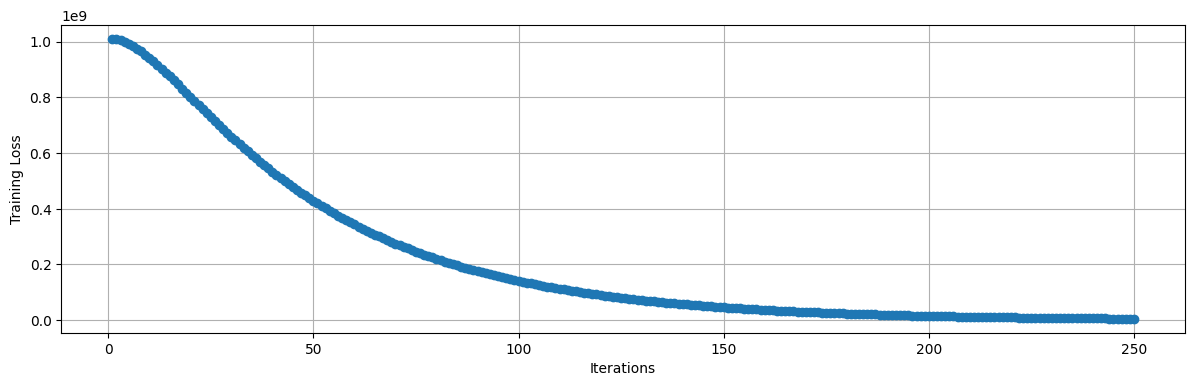

In [ ]:
plot_training_loss(J_list)

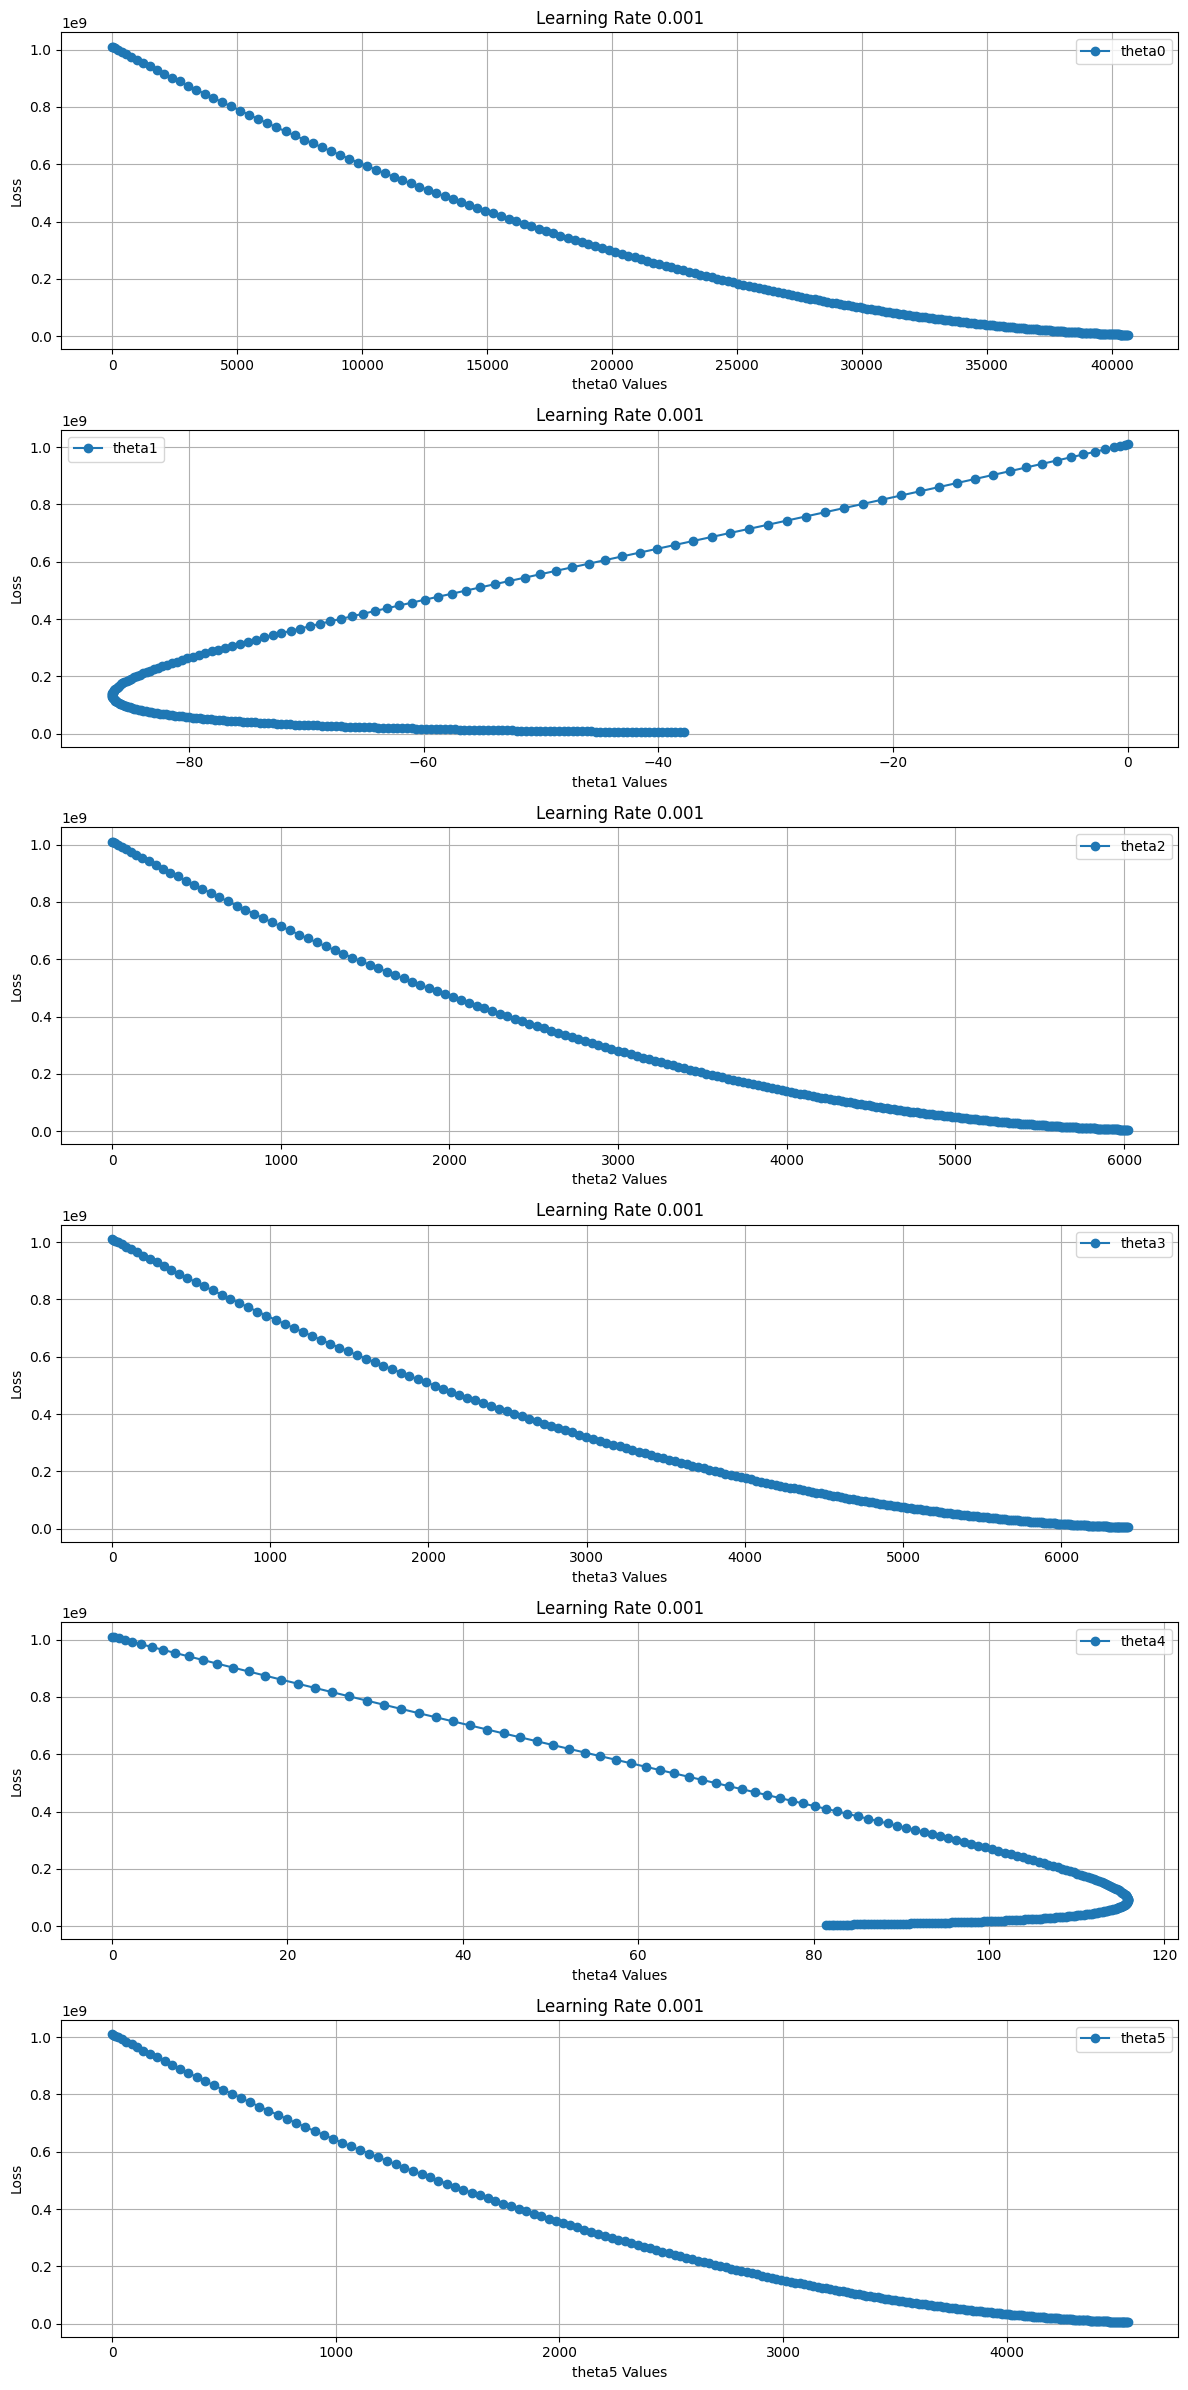

In [ ]:
plot_thetas(thetas_dict , J_list , 0.001 )

#### Scenario 2

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'gd_mom', alpha = 0.001 , max_epochs = 250 , gamma = 0.9, batch_size = 500)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs, y_predict = optimizer_instance.train(X_train_cars, y_train_cars)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"thetas_Opt : {thetas_Opt}")
print(f"\nCost = {J_list[-1]}\n")


****************** Epoch 0 ********************

j = 1009974981.9786867

****************** Epoch 1 ********************

j = 1007957615.8249469

****************** Epoch 2 ********************

j = 1004132188.1506504

****************** Epoch 3 ********************

j = 998693265.2520323

****************** Epoch 4 ********************

j = 991820920.1751229

****************** Epoch 5 ********************

j = 983681167.9113654

****************** Epoch 6 ********************

j = 974426534.764224

****************** Epoch 7 ********************

j = 964196717.8841959

****************** Epoch 8 ********************

j = 953119300.6226168

****************** Epoch 9 ********************

j = 941310497.1405131

****************** Epoch 10 ********************

j = 928875905.9690135

****************** Epoch 11 ********************

j = 915911257.2332948

****************** Epoch 12 ********************

j = 902503142.2534547

****************** Epoch 13 ********************

j = 88872

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train_cars , y_predict)}')

r2_score: 0.9139769090182557


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test_cars)
print(f'r2_score: {r2_score(y_test_cars , y_test_predict)}')

r2_score: 0.9137071337544695


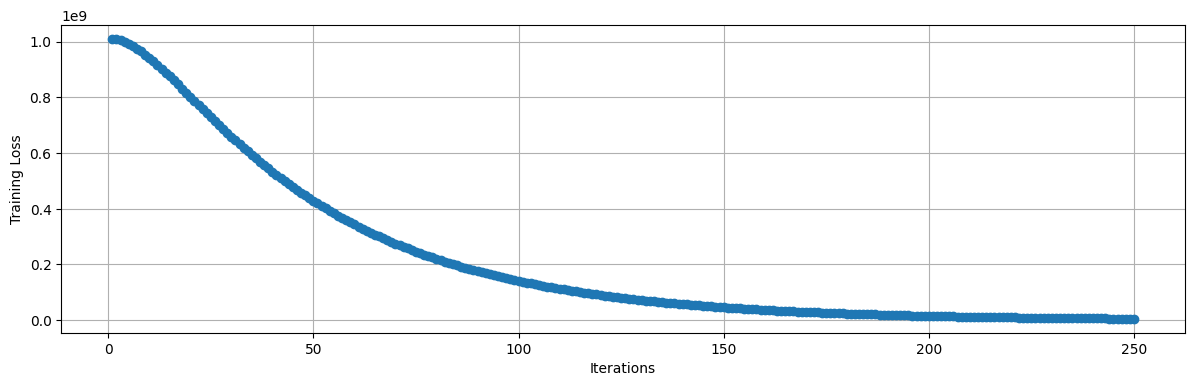

In [ ]:
plot_training_loss(J_list)

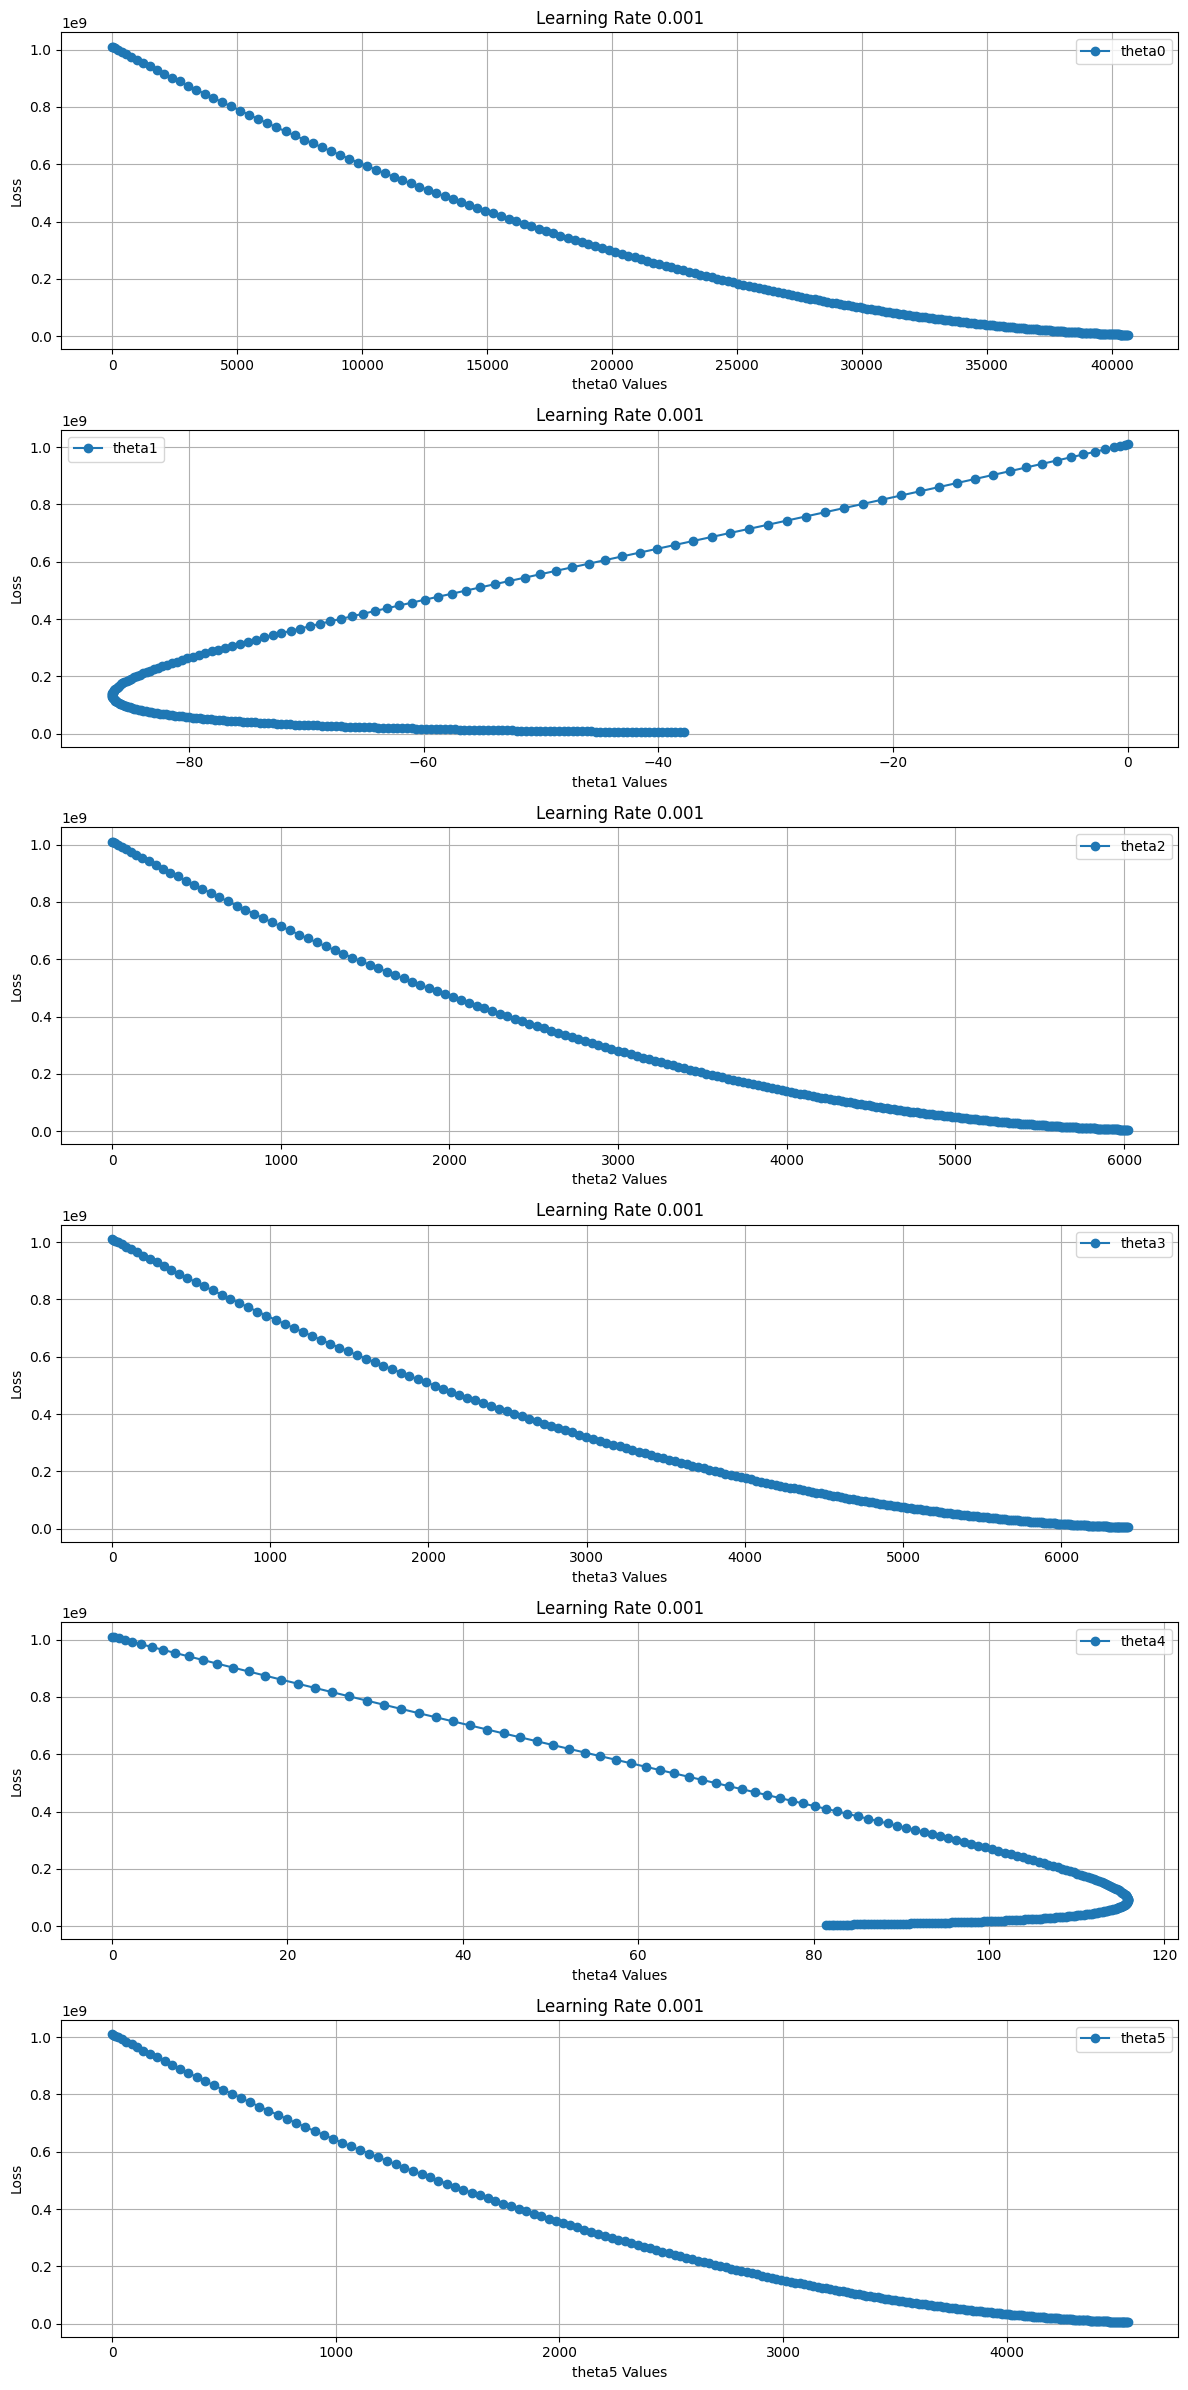

In [ ]:
plot_thetas(thetas_dict , J_list , 0.001 )

#### Scenario 3

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.2 , max_epochs = 5000 , epsilon = 1e-8 , beta1 = 0.2 , beta2 = 0.7 )

# Train the model
J_list , thetas_dict , thetas_Opt , iterations, Epochs , y_predict = optimizer_instance.train(X_train_cars, y_train_cars)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"thetas_Opt : {thetas_Opt}")
print(f"\nCost = {J_list[-1]}\n")


Streaming output truncated to the last 5000 lines.

j = 964697453.9348758

****************** Epoch 3754 ********************

j = 964685702.6872139

****************** Epoch 3755 ********************

j = 964673951.5978678

****************** Epoch 3756 ********************

j = 964662200.6672326

****************** Epoch 3757 ********************

j = 964650449.8950679

****************** Epoch 3758 ********************

j = 964638699.281686

****************** Epoch 3759 ********************

j = 964626948.826716

****************** Epoch 3760 ********************

j = 964615198.5303924

****************** Epoch 3761 ********************

j = 964603448.3923631

****************** Epoch 3762 ********************

j = 964591698.4129952

****************** Epoch 3763 ********************

j = 964579948.5920591

****************** Epoch 3764 ********************

j = 964568198.9299098

****************** Epoch 3765 ********************

j = 964556449.4262177

****************** Epoch 37

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train_cars , y_predict)}')

r2_score: -15.887001939324406


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test_cars)
print(f'r2_score: {r2_score(y_test_cars , y_test_predict)}')

r2_score: -15.684695845324974


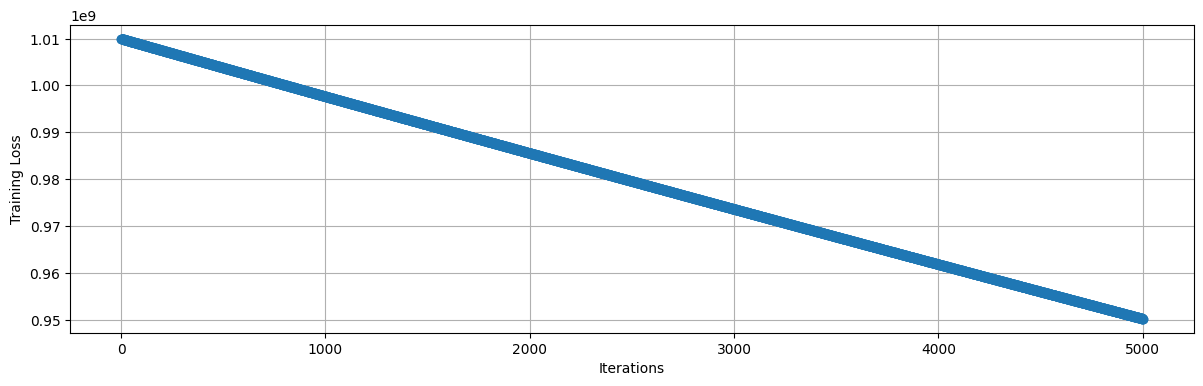

In [ ]:
plot_training_loss(J_list)

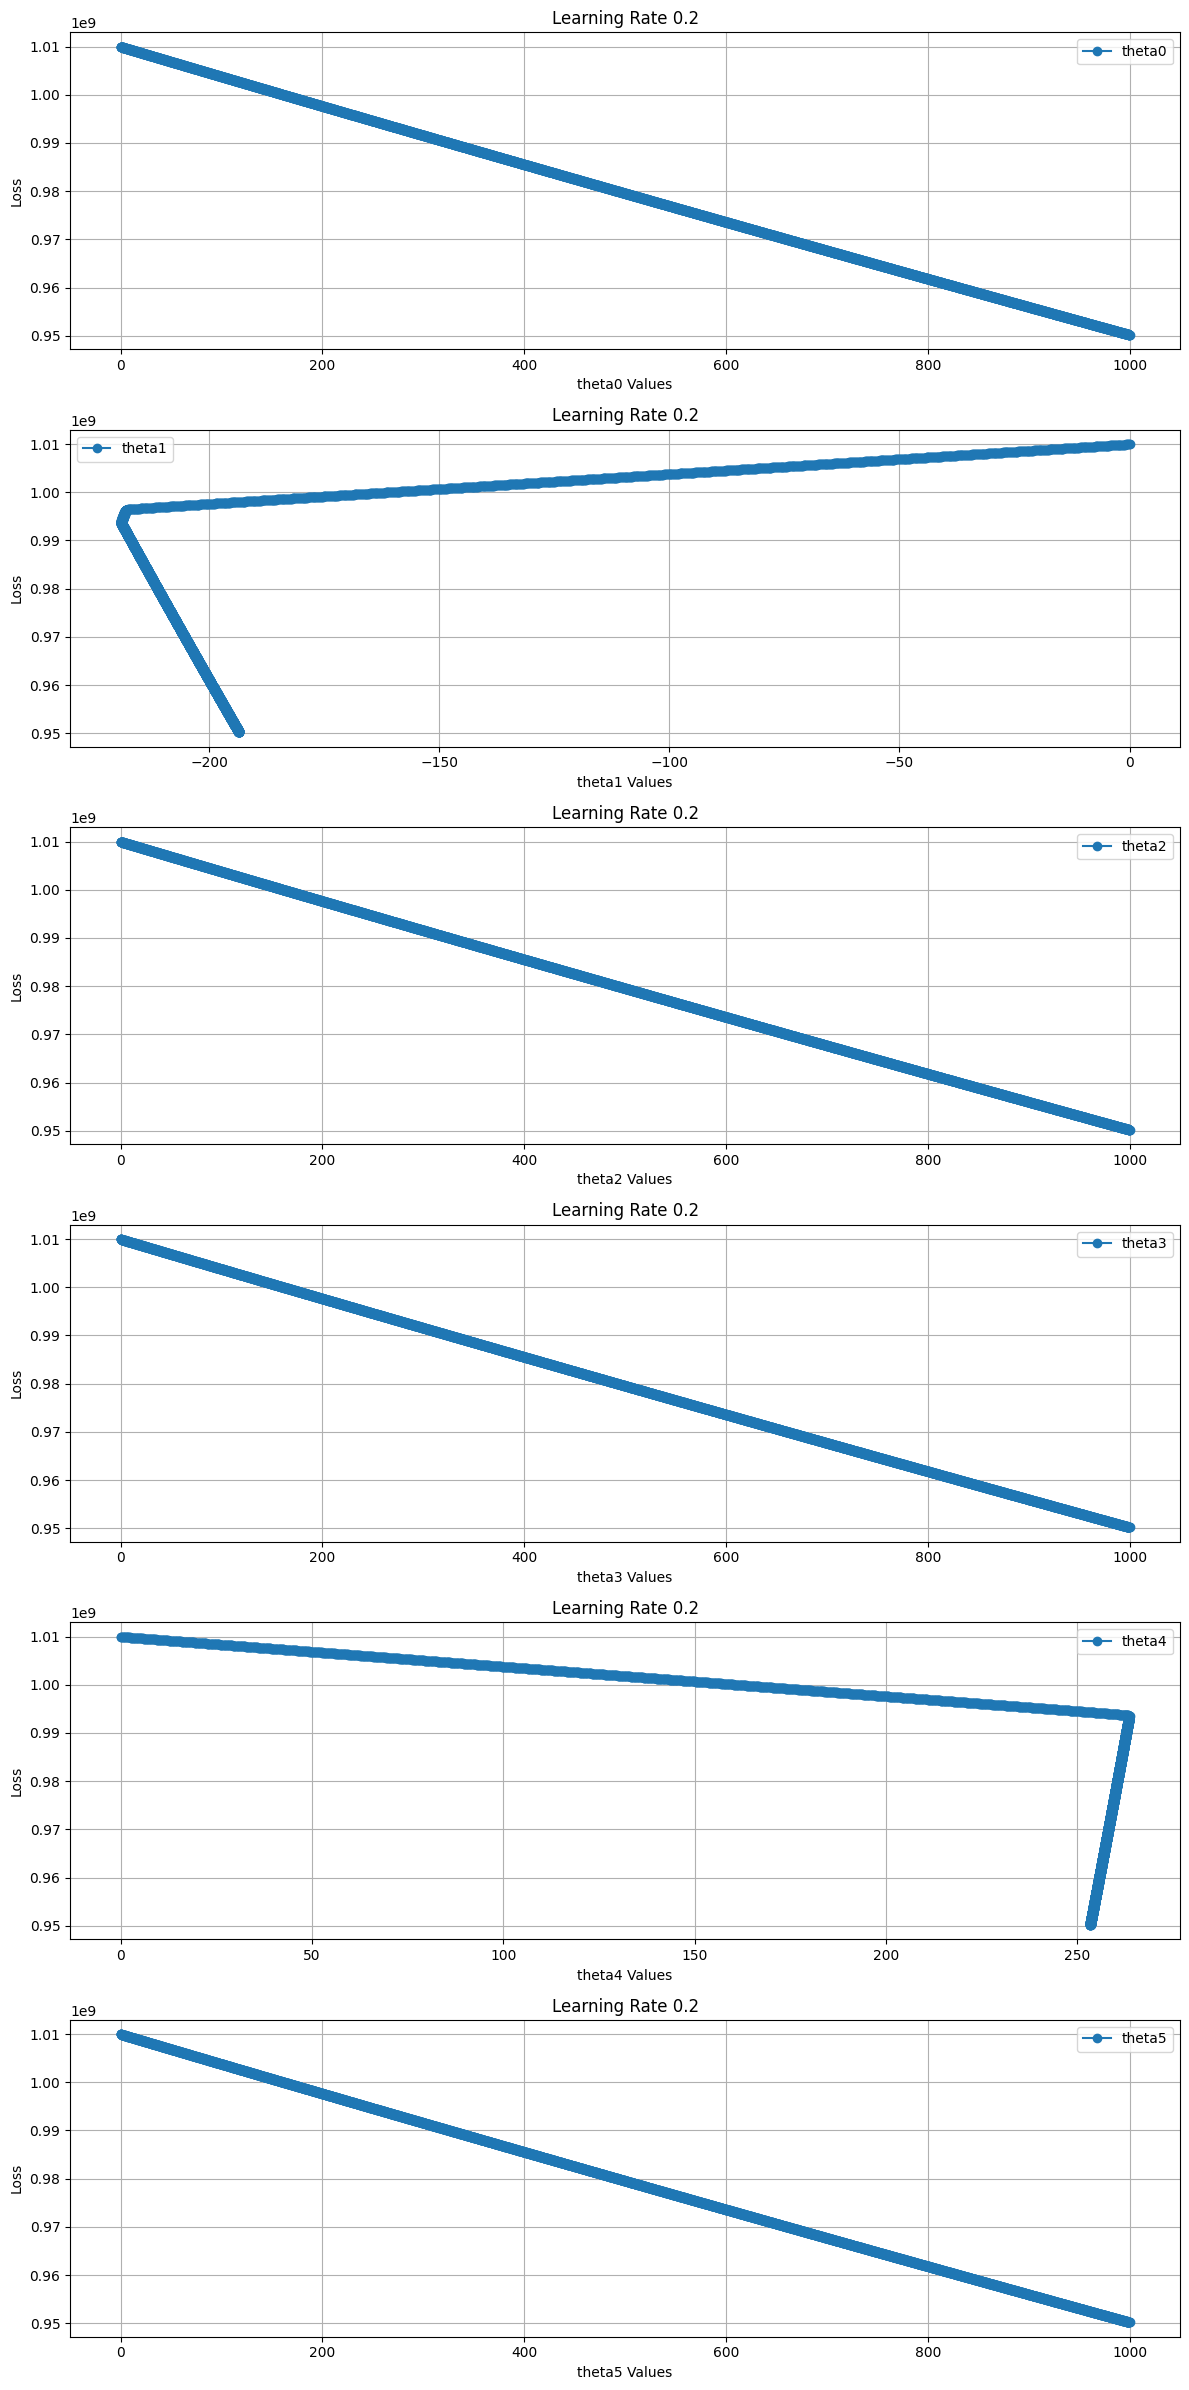

In [ ]:
plot_thetas(thetas_dict , J_list , 0.2)

#### Scenario 4

In [ ]:
# Define an Instance of the Optimizer
optimizer_instance = Optimizer(optimizer_type = 'adam', alpha = 0.2 , batch_size = 1 ,
                               max_epochs = 1000 , epsilon = 1e-8 , beta1 = 0.2 , beta2 = 0.7)

# Train the model
J_list , thetas_dict , thetas_Opt , iterations , Epochs , y_predict = optimizer_instance.train(X_train_cars, y_train_cars)

print("****************** Training Report ********************")
print(f"\nGradient Descent converged after {Epochs} Epochs\n")
print(f"theta_0_Opt : {thetas_Opt[0]}")
print(f"theta_1_Opt : {thetas_Opt[1]}\n")
print(f"\nCost = {J_list[-1]}\n")


Streaming output truncated to the last 5000 lines.

j = 80404.33758326933

j = 5049.451695679326

j = 20996.167669399314

j = 37150.56047297671

j = 462.527947807466

j = 10813.66046691994

j = 80438.72926003092

j = 21.55469445905599

j = 7871.543458969801

j = 1173.087172564307

j = 30.63336422811962

j = 10094.183763039096

j = 55003.46993093052

j = 10903.443237912916

j = 113.30401102595629

j = 103772.20010665033

j = 483.2106993113225

j = 89791.88551789257

j = 31622.750163388275

j = 81254.72741391748

j = 2677.976749992758

j = 27601.49241115062

j = 84920.4367936683

j = 23465.793758064683

j = 559.9303291790433

j = 32250.462244209935

j = 51486.143775792094

j = 9755.931779540986

j = 12825.551302194479

j = 8505.937794274594

j = 15703.18608134394

j = 12848.334307281719

j = 49433.413471935775

j = 5693.863897552531

j = 105444.08966246119

j = 44906.94676244192

j = 3626.799003062696

j = 846.1460928991226

j = 2255.1894177871086

j = 1575.112907912815

j = 54856.954937

In [ ]:
# Performance on train set
print(f'r2_score: {r2_score(y_train_cars , y_predict)}')

r2_score: 0.9994930193748754


In [ ]:
# Performance on test set
y_test_predict = optimizer_instance.predict(X_test_cars)
print(f'r2_score: {r2_score(y_test_cars , y_test_predict)}')

r2_score: 0.9994869510431902


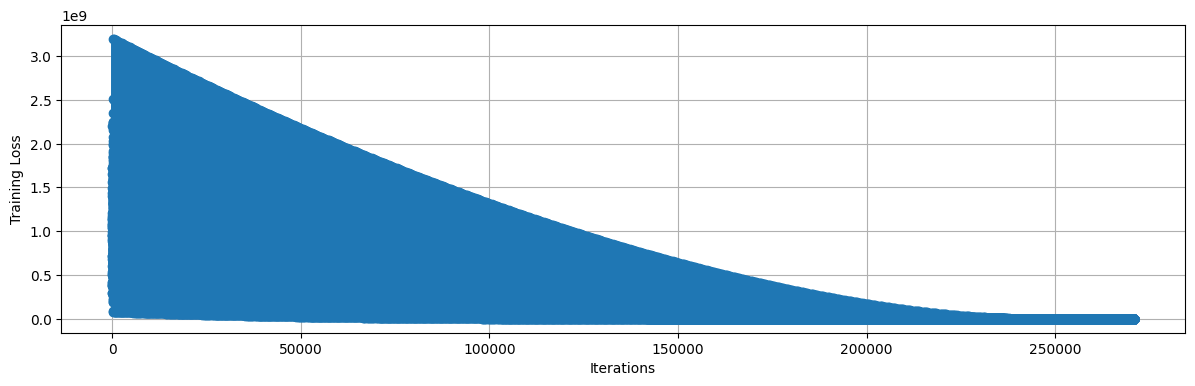

In [ ]:
plot_training_loss(J_list)

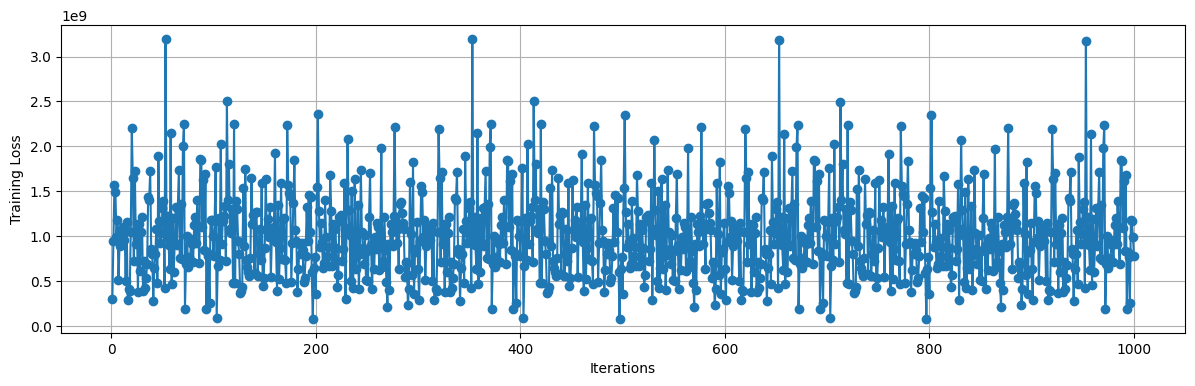

In [ ]:
# Zoming In
plot_training_loss(J_list[0:1000])

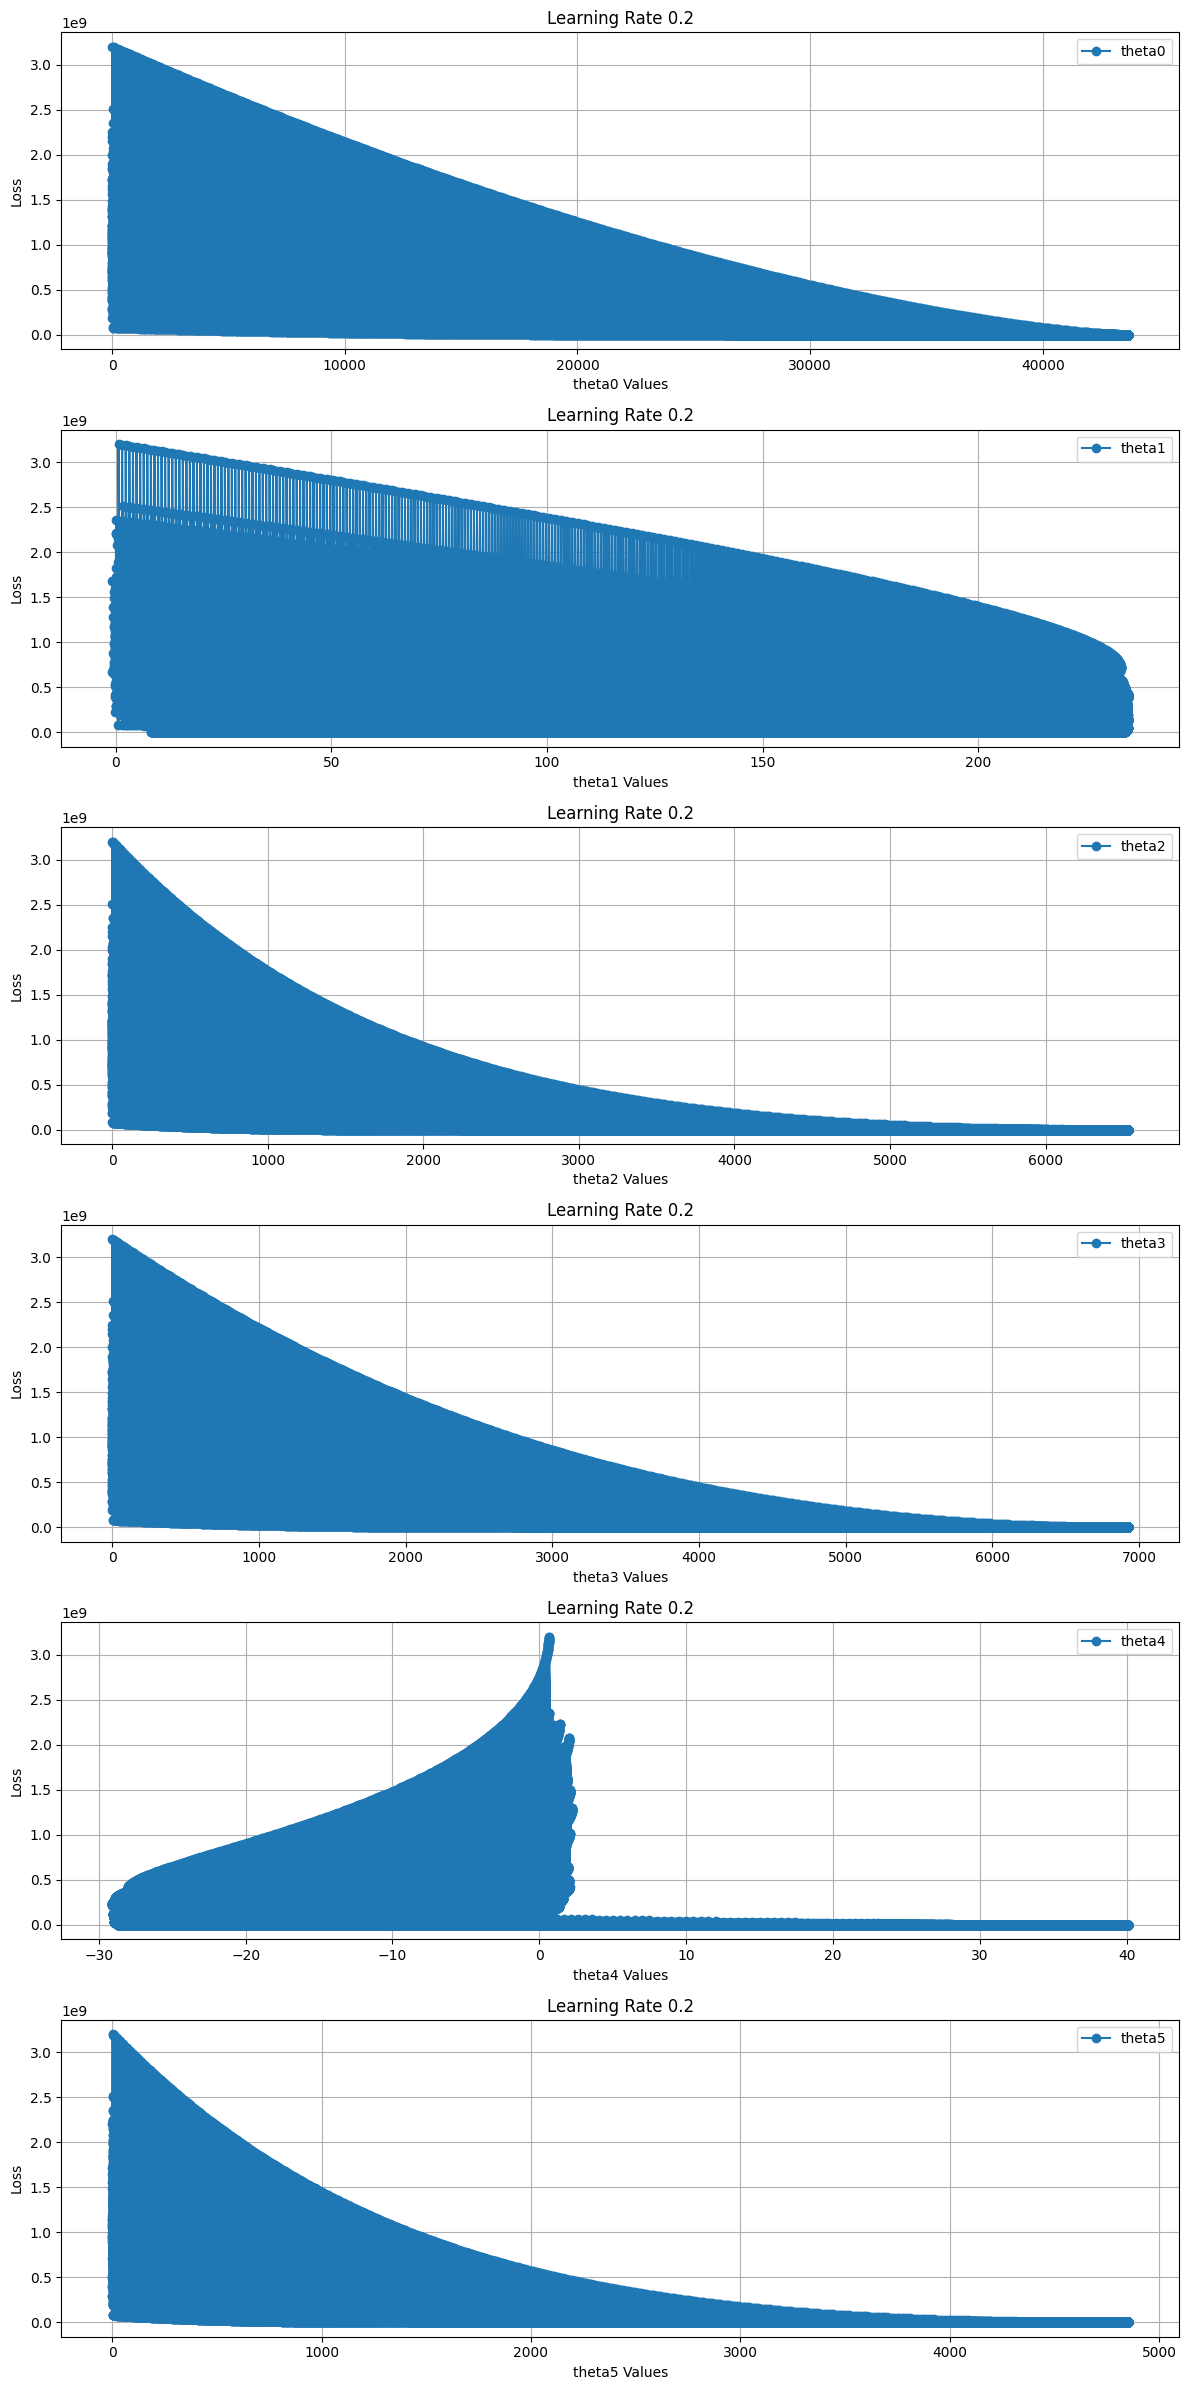

In [ ]:
plot_thetas(thetas_dict , J_list , 0.2)

#### Scenario 5

In [ ]:
# Define an Instance of the Optimizer
bfgs_optimizer_instance = BFGS_Optimizeer(epsilon = 0.001 , max_iterations = 500)

# Train Optimizer
theta_k, gk, iteration = bfgs_optimizer_instance.train(X_train_cars , y_train_cars )

print("****************** Training Report ********************")
print(f"\nBFGS converged after {iteration} Iterations \n")
print(f"thetas_Opt\n : {theta_k}")
print(f"\nGradient Norm = {np.linalg.norm(gk)}\n")


****************** Training Report ********************

BFGS converged after 7 Iterations 

thetas_Opt
 : [[4.36739927e+04]
 [1.85597195e+01]
 [6.52746224e+03]
 [6.92173989e+03]
 [2.93978280e+01]
 [4.86213672e+03]]

Gradient Norm = 1.8543866602011988e-05



In [ ]:
X_augmented = np.column_stack(( np.ones(X_train_cars.shape[0]) , X_train_cars ))
y_predict = np.matmul(X_augmented , theta_k)
print(f'r2_score: {r2_score(y_train_cars , y_predict)}')

r2_score: 0.9994952855073973


In [ ]:
X_augmented = np.column_stack(( np.ones(X_test_cars.shape[0]) , X_test_cars ))
y_predict = np.matmul(X_augmented , theta_k)
print(f'r2_score: {r2_score(y_test_cars, y_predict)}')

r2_score: 0.999495792773868
